In [13]:
import os
import sys
import pprint
import inspect
# Get current working directory instead of __file__
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
trait_model_path = os.path.abspath(os.path.join(os.getcwd(), "..", "TraitPredictionModel"))
sys.path.append(trait_model_path)
from modelFunc import setAndTestPlotModel, setAndTestPlotModel_with_extra_input, setAndTestModelByDate, run_test_and_save_results, run_test_and_save_results_with_extra_input
# model
from ModelArchitecture.ConvNeXtTinyModel import ConvNeXtTinyWheatModelWithConfidence
from ModelArchitecture.DenseNetModel import DenseNet121WheatModel
from ModelArchitecture.EfficientNetV2Model import EfficientNetV2SWheatCountWithConfidence
from ModelArchitecture.RepVGGA1Model import RepVGGA1WheatModelWithConfidence
from ModelArchitecture.EfficientNetV2MModel import EfficientNetV2MWheatModelWithConfidence
from ModelArchitecture.RepVGGB1g4Model import RepVGGB1g4Model
from ModelArchitecture.RegNetY8GFModel import RegNetY8GFModel
from ModelArchitecture.MobileViTV2Model import MobileViTV2WheatModel
from ModelArchitecture.MobileViTV2AddoneextrainputModel import MobileViTV2ConfidenceAddoneextrainput, MobileViTV2ConfidenceAddtwoextrainput
from ModelArchitecture.ConvNeXtTinyAddoneextrainputModel import ConvNeXtTinyConfidenceAddoneextrainput, ConvNeXtTinyConfidenceAddtwoextrainput
from ModelArchitecture.EfficientNetV2SAddextrainputModel import EfficientNetV2SConfidenceAddoneextrainput, EfficientNetV2SConfidenceAdd2Inputs
from ModelArchitecture.DenseNetAddextrainputModel import DenseNetConfidenceAddoneextrainput, DenseNetConfidenceAdd2Inputs
from ModelArchitecture.RepVGGA1AddextrainputModel import RepVGGA1ConfidenceAddoneextrainput, RepVGGA1ConfidenceAdd2Inputs
from ModelArchitecture.EfficientNetV2MAddextrainputModel import EfficientNetV2MConfidenceAddeonextrainput, EfficientNetV2MConfidenceAdd2Inputs
from ModelArchitecture.RegNetY8GFAddextrainputModel import RegNetY8GFConfidenceAddoneextrainput, RegNetYConfidenceAdd2Inputs
from ModelArchitecture.MobileOneModel import MobileOneConfidence, MobileOneConfidenceAddoneextrainput, MobileOneConfidenceAddtwoextrainput
from ModelArchitecture.MaxViTModel import MaxViTConfidenceModel, MaxViTConfidenceAddoneextrainput, MaxViTConfidenceAddtwoextrainput
from ModelArchitecture.CoatNetModel import CoAtNetConfidenceModel, CoAtNetConfidenceAddOneExtraInput, CoAtNetConfidenceAddTwoExtraInput
from ModelArchitecture.FocalNetModel import FocalNetConfidenceModel, FocalNetConfidenceAddoneextrainput, FocalNetConfidenceAddtwoextrainput
from ModelArchitecture.SwinTransformerV2Model import SwinV2ConfidenceModel, SwinV2ConfidenceAddOneExtraInput, SwinV2ConfidenceAddTwoExtraInput
from ModelArchitecture.EfficientFormerV2Model import EfficientFormerConfidenceModel, EfficientFormerConfidenceAddOneExtraInput, EfficientFormerConfidenceAddTwoExtraInput
from ModelArchitecture.PoolFormerModel import PoolFormerConfidenceModel, PoolFormerConfidenceAddOneExtraInput, PoolFormerConfidenceAddTwoExtraInput
from ModelArchitecture.ConvNeXtV2Model import ConvNeXtV2WheatModelWithConfidence, ConvNeXtV2ConfidenceAddoneextrainput, ConvNeXtV2ConfidenceAddtwoextrainput

In [14]:
current2025Data = ['totEarNum', 'days', 'LAI', 'SPAD']

# run_test_and_save_results_with_extra_input(dataPath, modelTarget, modelDict[modelBackbone], modelPath, extraInpList)
# run_test_and_save_results(dataPath, modelTarget, modelDict[modelBackbone], modelPath)

In [15]:
def get_imported_class_dict():
    current_module = sys.modules[__name__]
    return {
        name: obj
        for name, obj in globals().items()
        if inspect.isclass(obj) and obj.__module__ != current_module.__name__
    }
modelDict = get_imported_class_dict()

def loopTestModelNoExtraByPath(modelFilePath):

    countModel = 0
    for fullModelName in sorted(os.listdir(modelFilePath)):

        # check if not .gitkeep file
        if( fullModelName == ".gitkeep" or fullModelName[0] == '.' ):
            continue

        modelPath = modelFilePath + fullModelName

        modelTarget = (fullModelName.split("_")[0])
        if( modelTarget not in current2025Data ):
            continue

        if(modelTarget == 'LAI'):
            dataPath = "./2025_LAI_Raw1.csv"
            # continue
        elif(modelTarget == 'SPAD'):
            dataPath = "./2025_SPAD_Raw1.csv"
            # continue
        elif(modelTarget == 'days'):
            dayData = fullModelName.split('_')[-1].split('.')[0]
            if(dayData == "noERR"):
                dataPath = "./2025_SPAD_Raw1.csv"
                # continue
            elif(dayData == "from3"):
                dataPath = "./2025_SPAD_Raw1.csv"
                # continue
            elif(dayData == "from4"):
                dataPath = "./2025_LAI_From4_Raw1.csv"
        else:
            dataPath = "./2025_totEarNum_day_Raw1.csv"
            # continue
            
        modelDict = get_imported_class_dict()
        modelBackbone = (fullModelName.split("_")[1])

        countModel += 1
        # print(countModel)
        # print("modelPath: ", modelPath)
        # print("dataPath: ", dataPath)
        # print("modelTarget: ", modelTarget)
        # print("modelBackbone: ", modelBackbone)
        # run_test_and_save_results(dataPath, modelTarget, modelDict[modelBackbone], modelPath, use_all_data_as_test=True)

def loopTestModelExtraInputByPath(modelFilePath):

    countModel = 0
    for fullModelName in sorted(os.listdir(modelFilePath)):
        
        # check if not .gitkeep file
        if( fullModelName == ".gitkeep" or fullModelName[0] == '.' ):
            continue

        modelPath = modelFilePath + fullModelName

        modelTarget = (fullModelName.split("_")[0])
        if( modelTarget not in current2025Data ):
            continue

        modelDict = get_imported_class_dict()
        modelBackbone = fullModelName.split("_")[1]

        extraInputList = fullModelName.split("_")[2].split('-')

        skip = False
        for extraInput in extraInputList:
            if(extraInput not in current2025Data):
                # print(fullModelName)
                skip = True
                continue
        if(skip):
            continue

        if("LAI" == modelTarget or "LAI" in extraInputList):
            dataPath = "./2025_LAI_Raw1.csv"
        elif("SPAD" == modelTarget or "SPAD" in extraInputList):
            dataPath = "./2025_SPAD_Raw1.csv"
        else:
            dataPath = "./2025_totEarNum_day_Raw1.csv"
        
        countModel += 1
        print(countModel, "/ 78")
        print("modelPath: ", modelPath)
        print("dataPath: ", dataPath)
        print("modelTarget: ", modelTarget)
        print("modelBackbone: ", modelBackbone)
        run_test_and_save_results_with_extra_input(dataPath, modelTarget, modelDict[modelBackbone], modelPath, extraInputList, use_all_data_as_test=True)


        



1 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_CoAtNetConfidenceAddOneExtraInput_SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  CoAtNetConfidenceAddOneExtraInput
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torch/__init__.py:1236: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/tensor/python_tensor.cpp:436.)
  _C._set_default_tensor_type(t)


✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -246.2697
MAE      : 22.4233
RMSE     : 22.4870


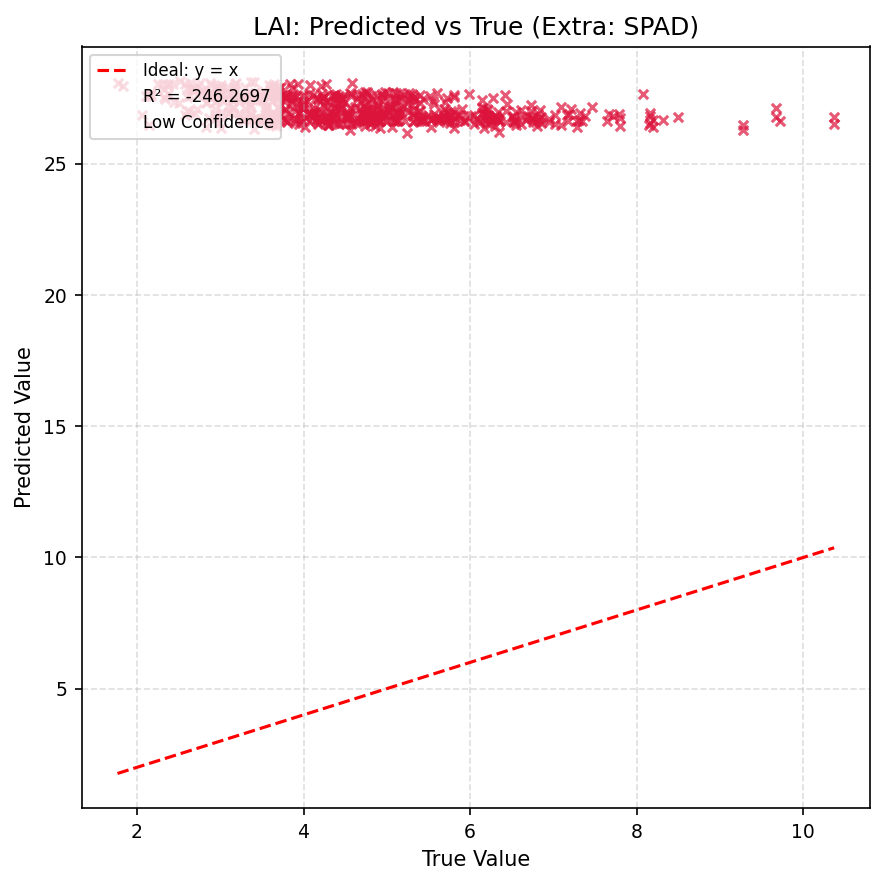


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
2 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_CoAtNetConfidenceAddOneExtraInput_days_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  CoAtNetConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.9503
MAE      : 1.6597
RMSE     : 1.9971


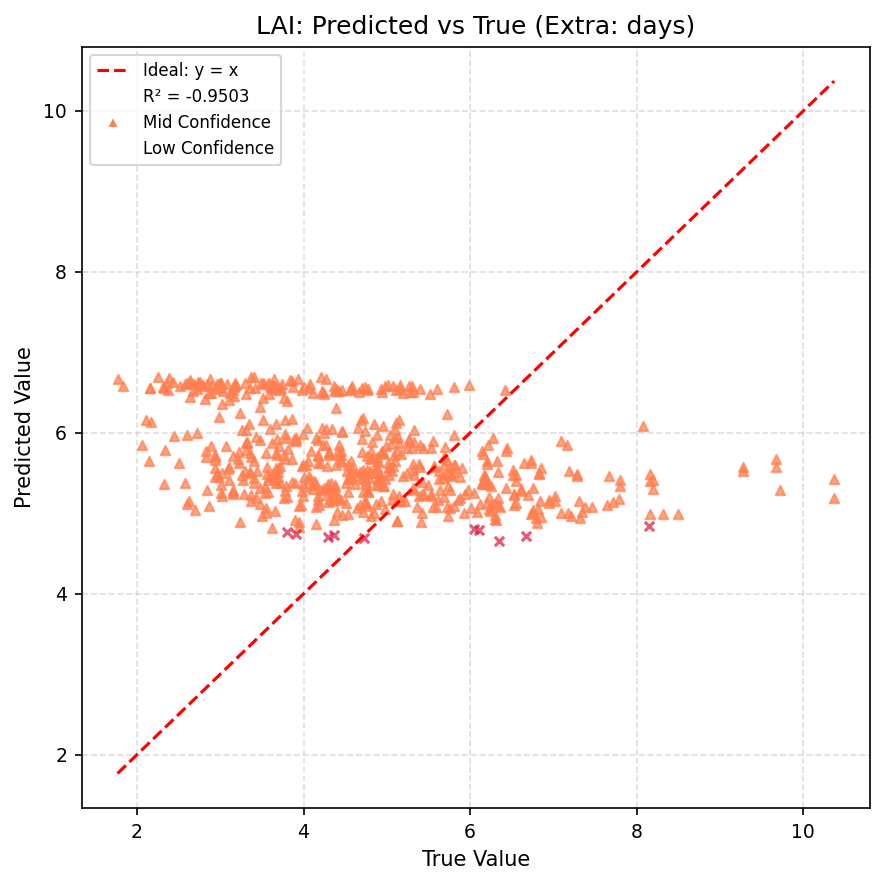


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
3 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_CoAtNetConfidenceAddTwoExtraInput_days-SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  CoAtNetConfidenceAddTwoExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -65.7714
MAE      : 11.5956
RMSE     : 11.6854


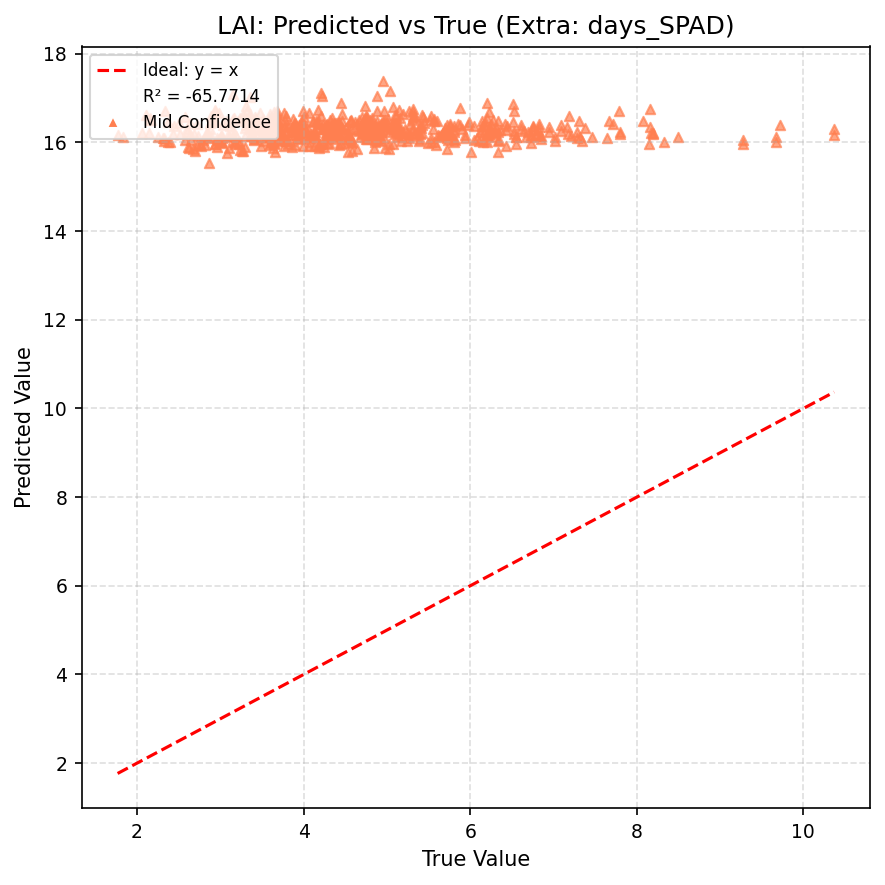


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
4 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_ConvNeXtTinyConfidenceAddoneextrainput_SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  ConvNeXtTinyConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -54.5875
MAE      : 10.5640
RMSE     : 10.6619


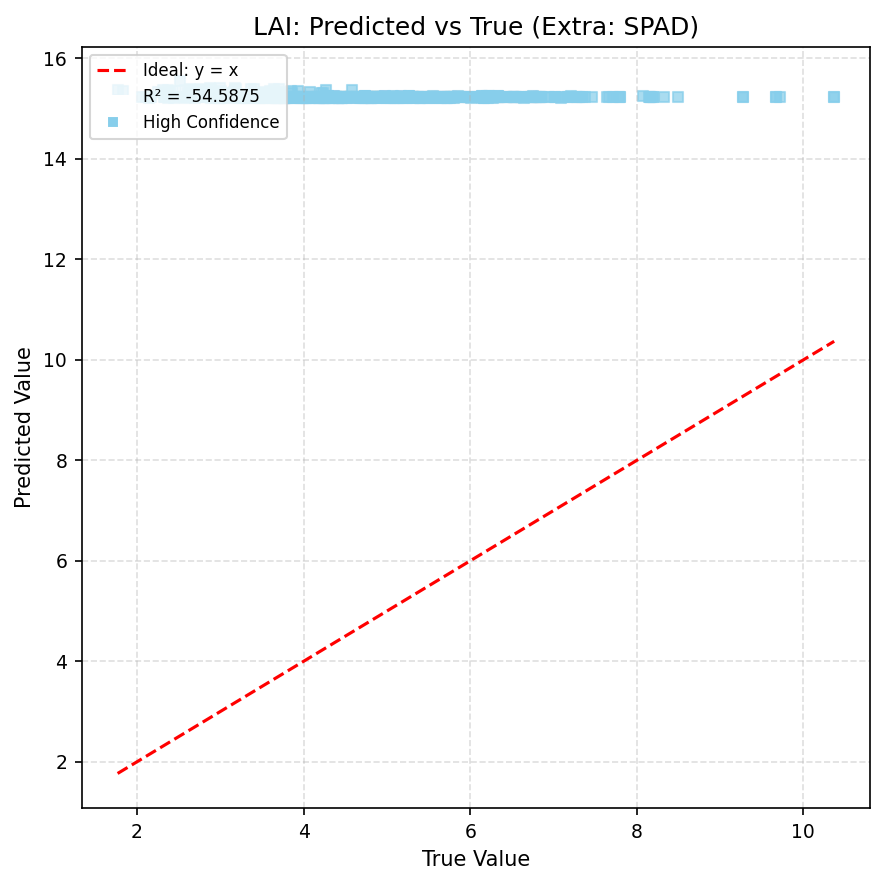


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
5 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_ConvNeXtTinyConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  ConvNeXtTinyConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -110.2675
MAE      : 15.0077
RMSE     : 15.0845


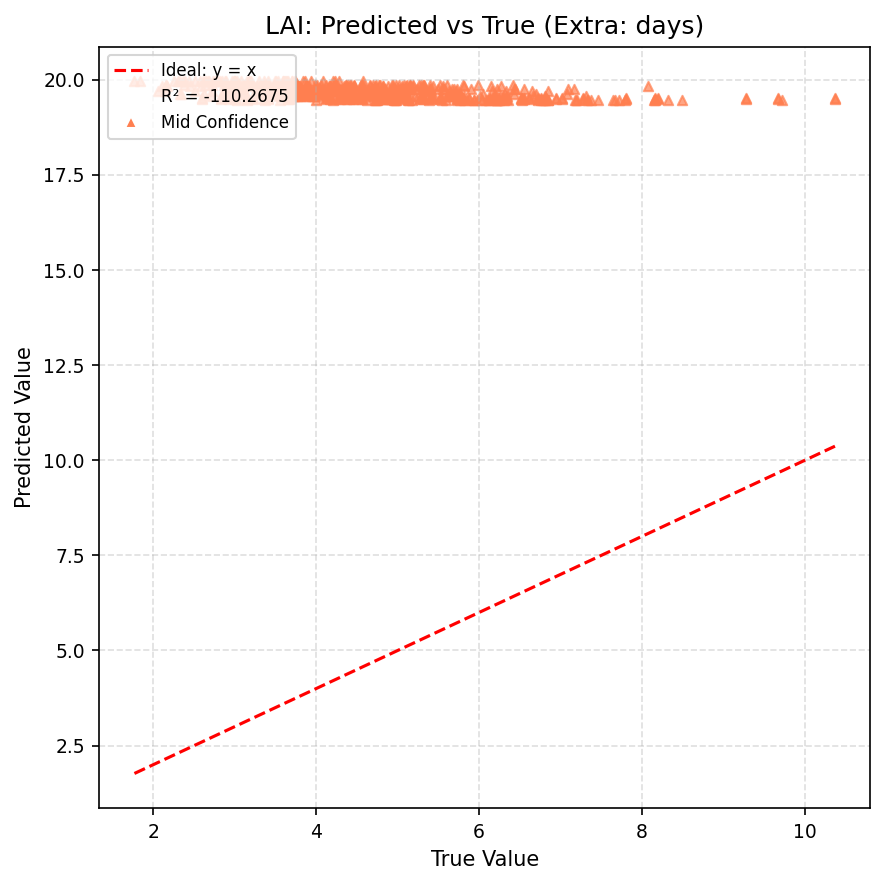


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
6 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_ConvNeXtTinyConfidenceAddtwoextrainput_days-SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  ConvNeXtTinyConfidenceAddtwoextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -52.7486
MAE      : 10.3716
RMSE     : 10.4841


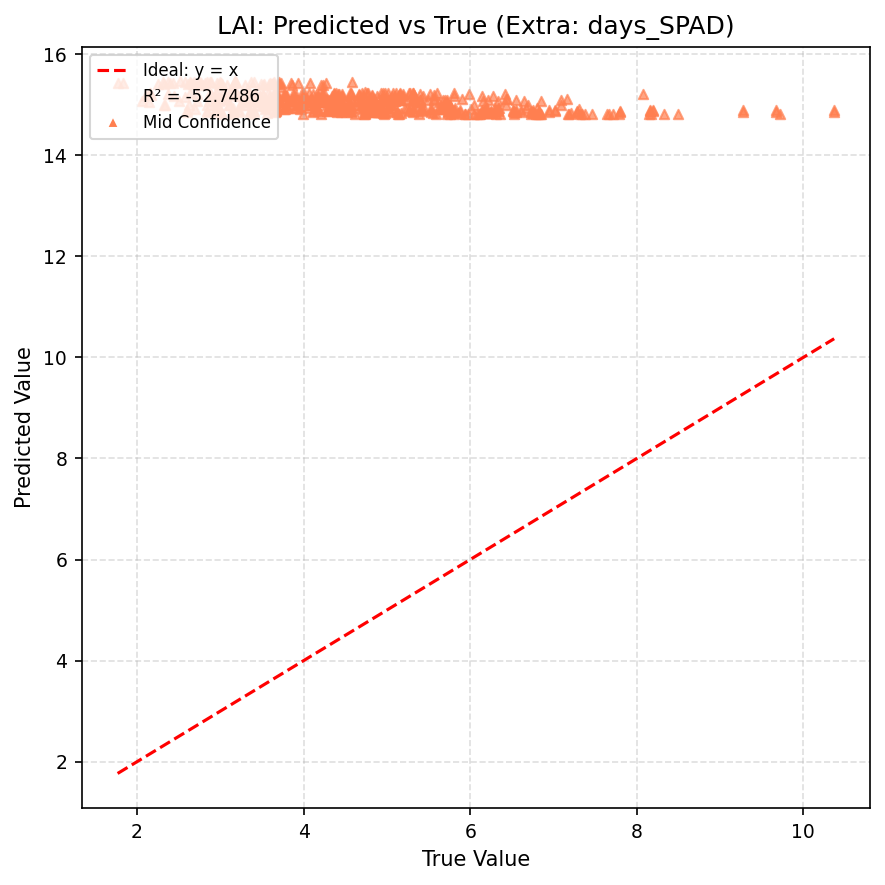


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
7 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_DenseNetConfidenceAdd2Inputs_days-SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  DenseNetConfidenceAdd2Inputs
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -4.4797
MAE      : 3.0247
RMSE     : 3.3475


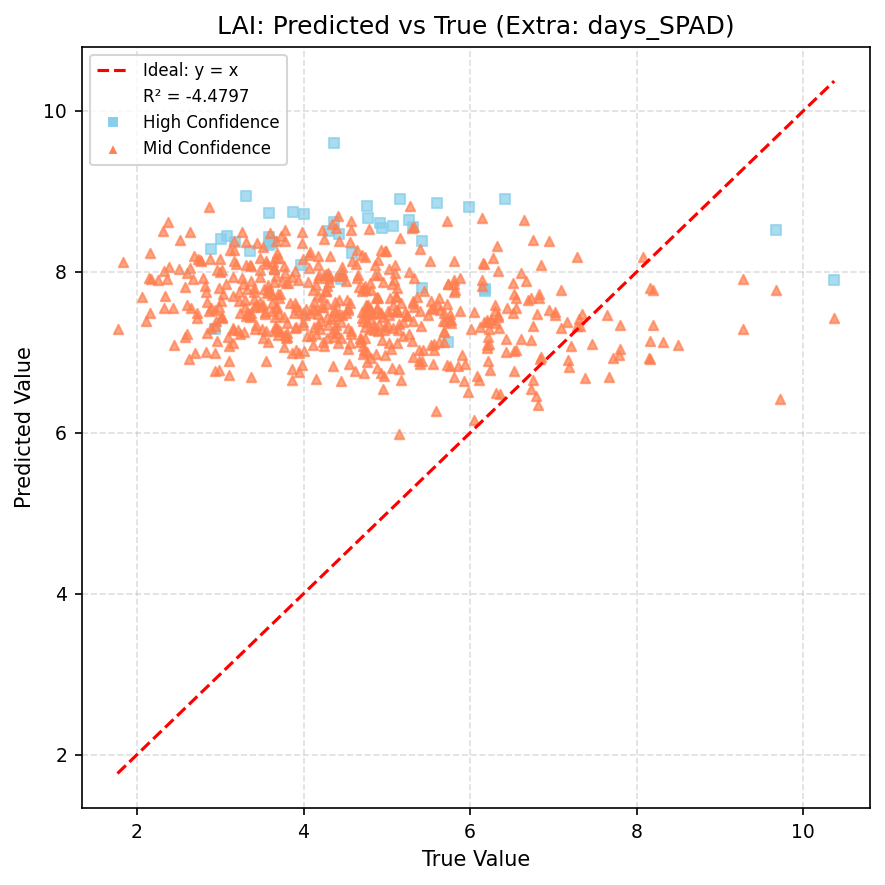


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
8 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_DenseNetConfidenceAddoneextrainput_SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  DenseNetConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -2.5394
MAE      : 2.3572
RMSE     : 2.6904


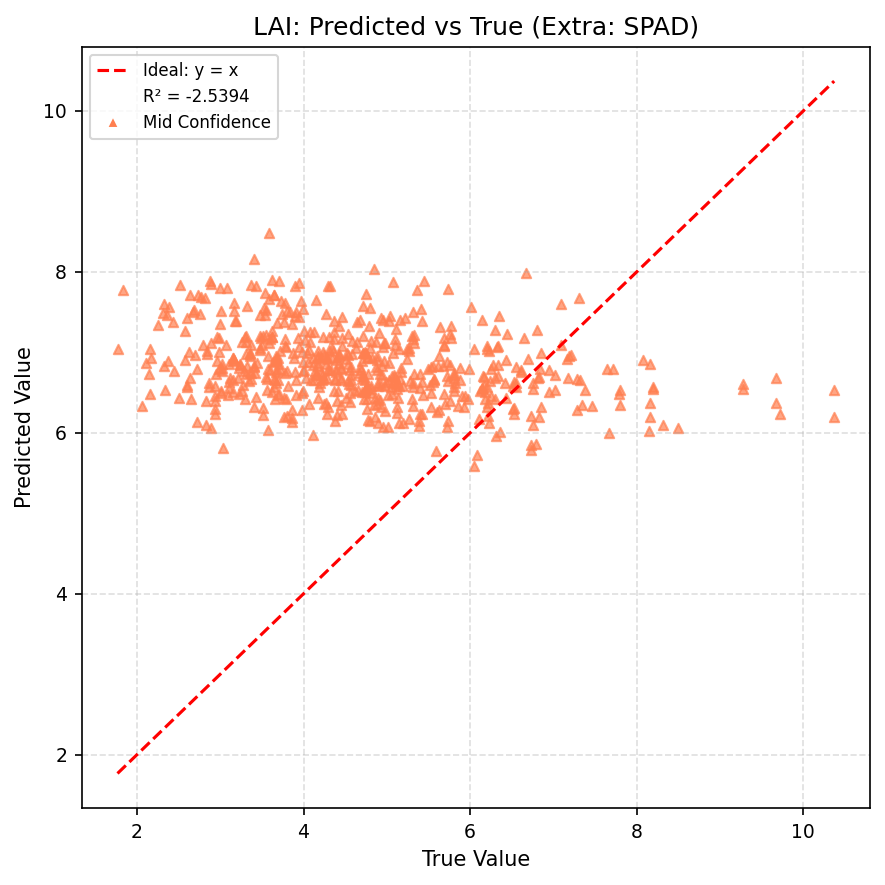


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
9 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_DenseNetConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  DenseNetConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.8168
MAE      : 1.5867
RMSE     : 1.9275


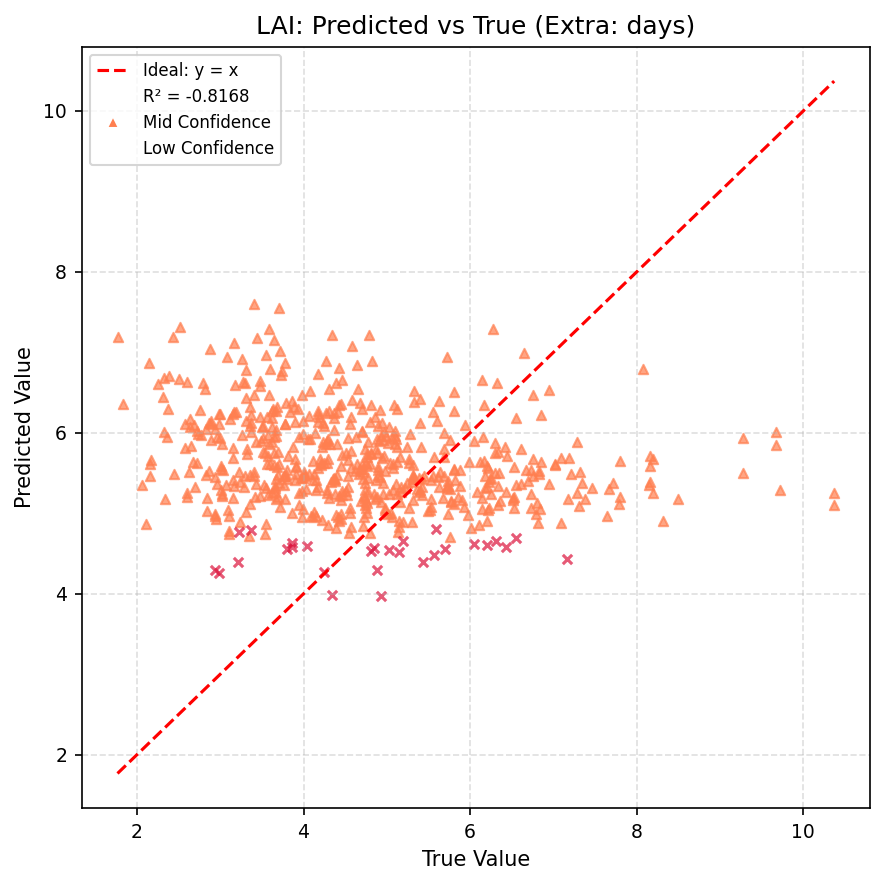


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
10 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_EfficientFormerConfidenceAddOneExtraInput_SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  EfficientFormerConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -52.1736
MAE      : 10.3273
RMSE     : 10.4279


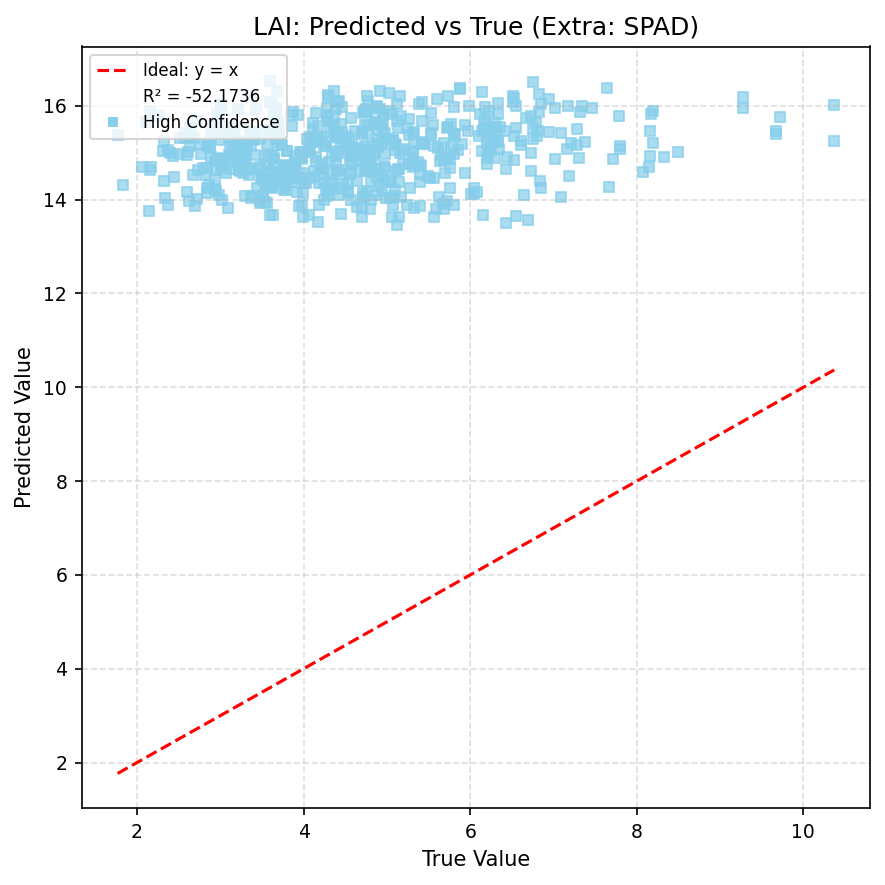


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
11 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_EfficientFormerConfidenceAddOneExtraInput_days_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  EfficientFormerConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -18.2838
MAE      : 6.0273
RMSE     : 6.2798


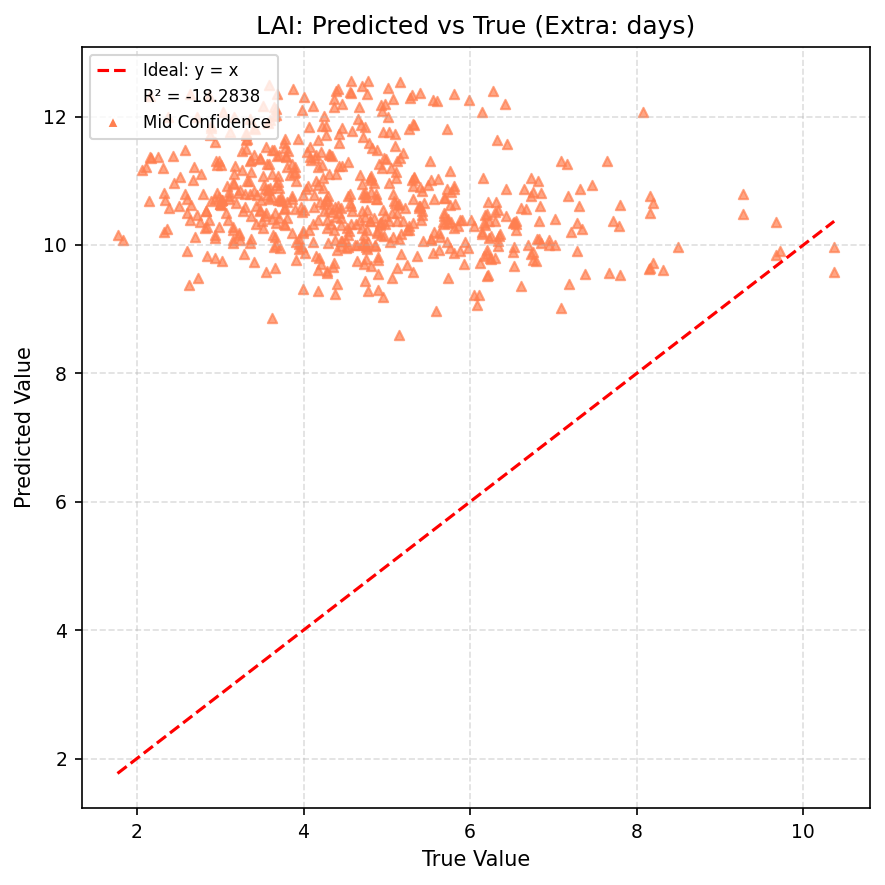


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
12 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_EfficientFormerConfidenceAddTwoExtraInput_days-SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  EfficientFormerConfidenceAddTwoExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -4.8179
MAE      : 3.1478
RMSE     : 3.4493


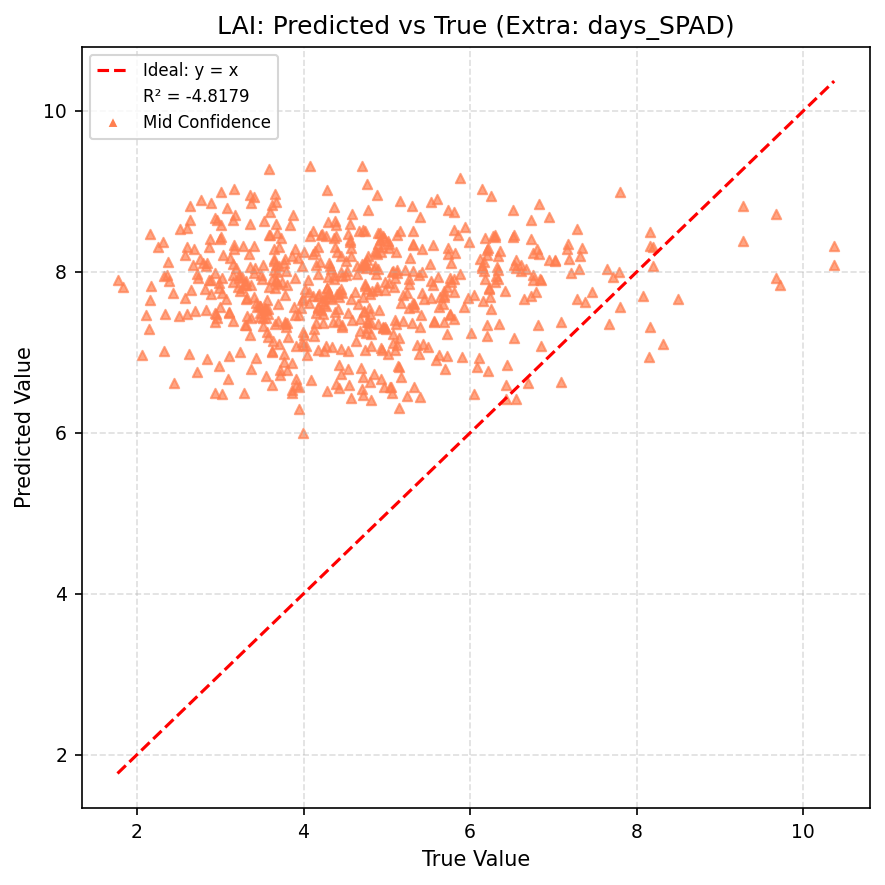


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
13 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_EfficientNetV2MConfidenceAdd2Inputs_days-SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  EfficientNetV2MConfidenceAdd2Inputs
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -5.6404
MAE      : 3.4502
RMSE     : 3.6850


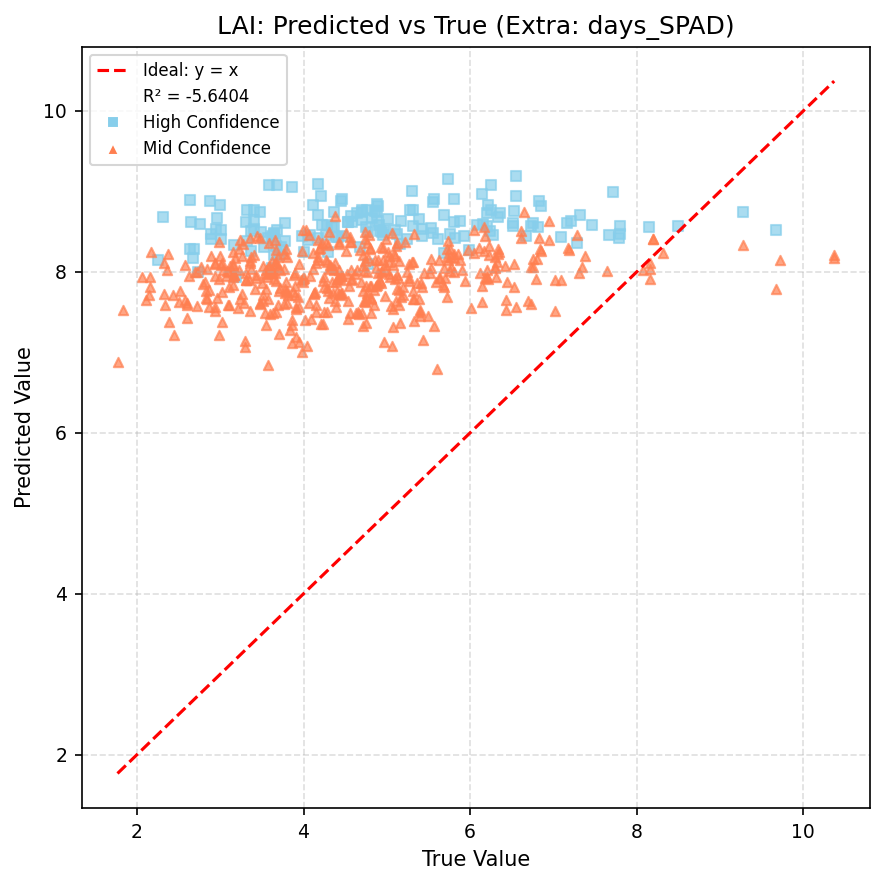


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
14 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_EfficientNetV2MConfidenceAddeonextrainput_SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  EfficientNetV2MConfidenceAddeonextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.0221
MAE      : 1.1224
RMSE     : 1.4458


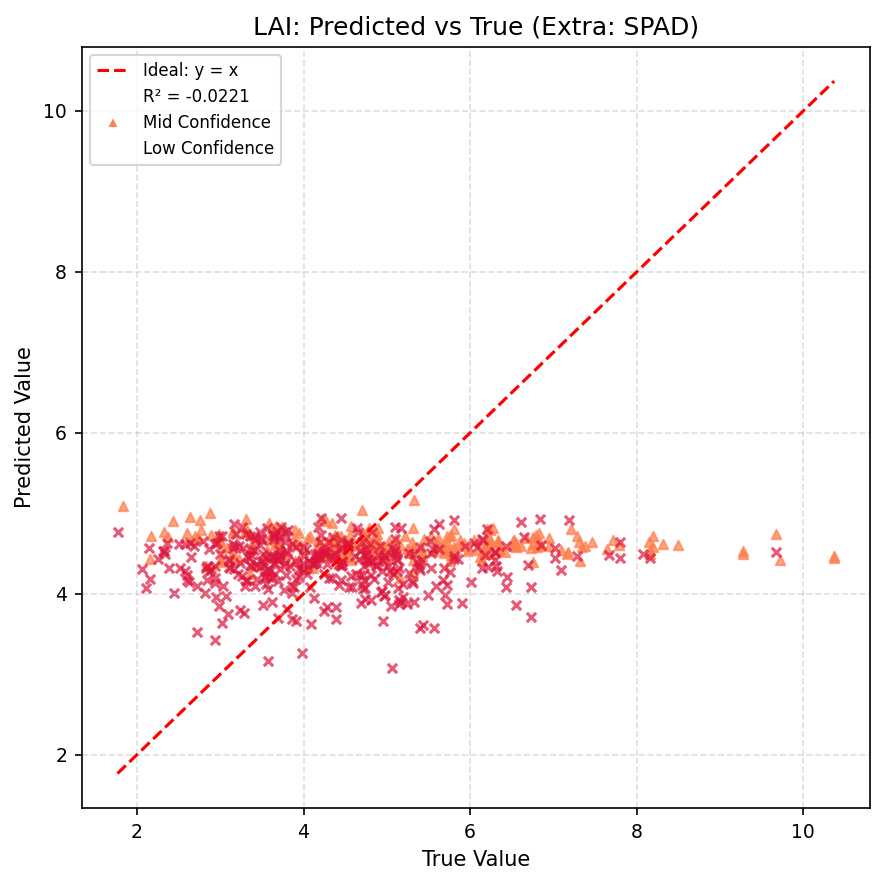


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
15 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_EfficientNetV2MConfidenceAddeonextrainput_days_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  EfficientNetV2MConfidenceAddeonextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -65.1626
MAE      : 11.5379
RMSE     : 11.6320


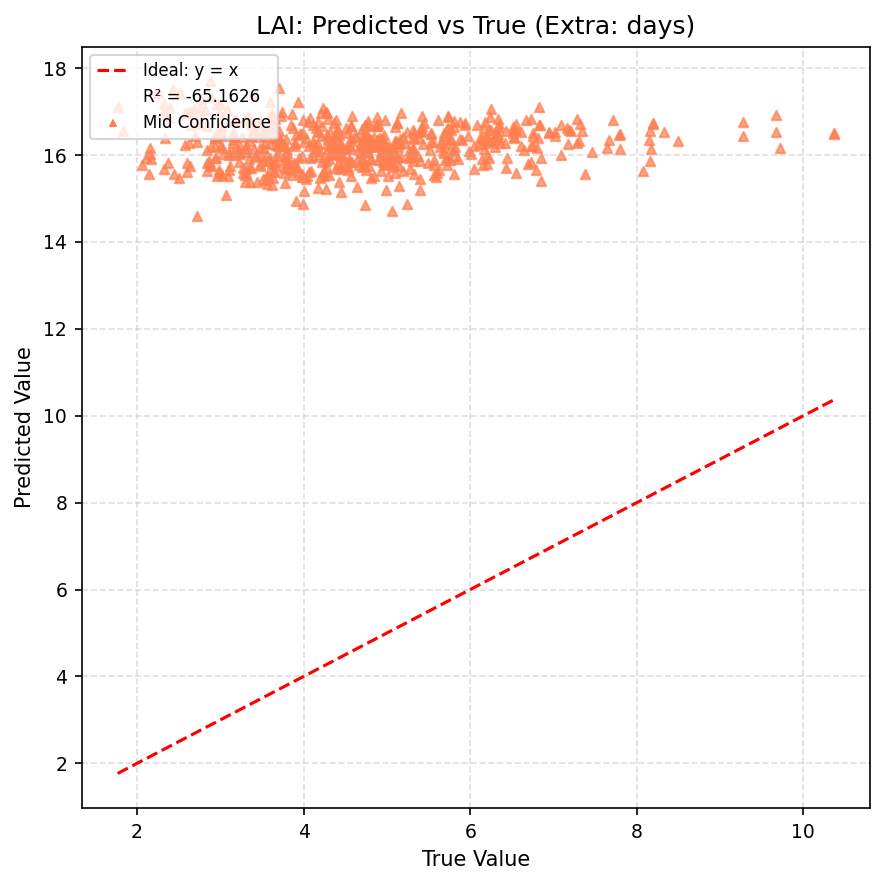


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
16 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_FocalNetConfidenceAddoneextrainput_SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  FocalNetConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -59.8524
MAE      : 11.0539
RMSE     : 11.1554


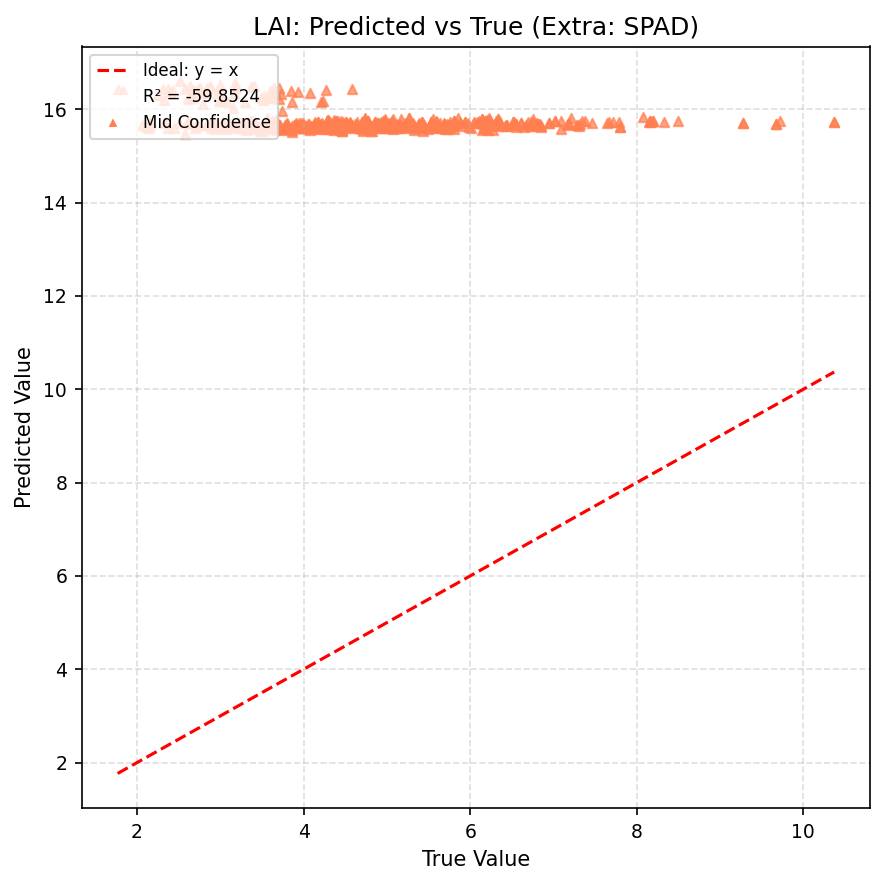


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
17 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_FocalNetConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  FocalNetConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -68.5391
MAE      : 11.8281
RMSE     : 11.9251


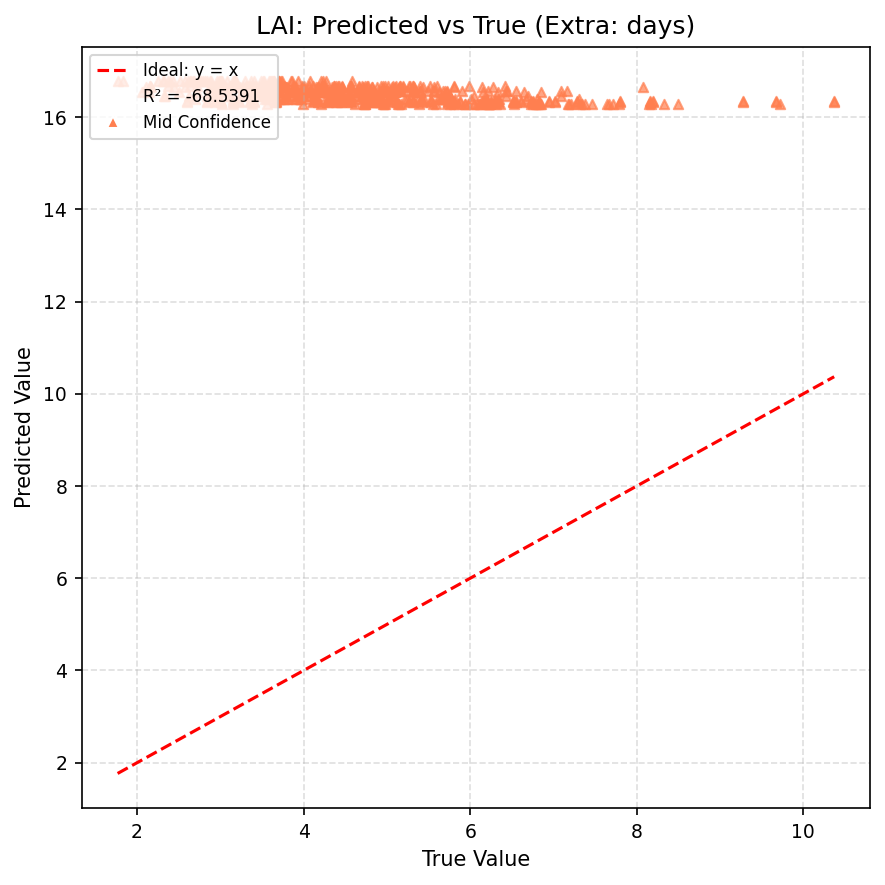


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
18 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_FocalNetConfidenceAddtwoextrainput_days-SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  FocalNetConfidenceAddtwoextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.1089
MAE      : 1.2094
RMSE     : 1.5059


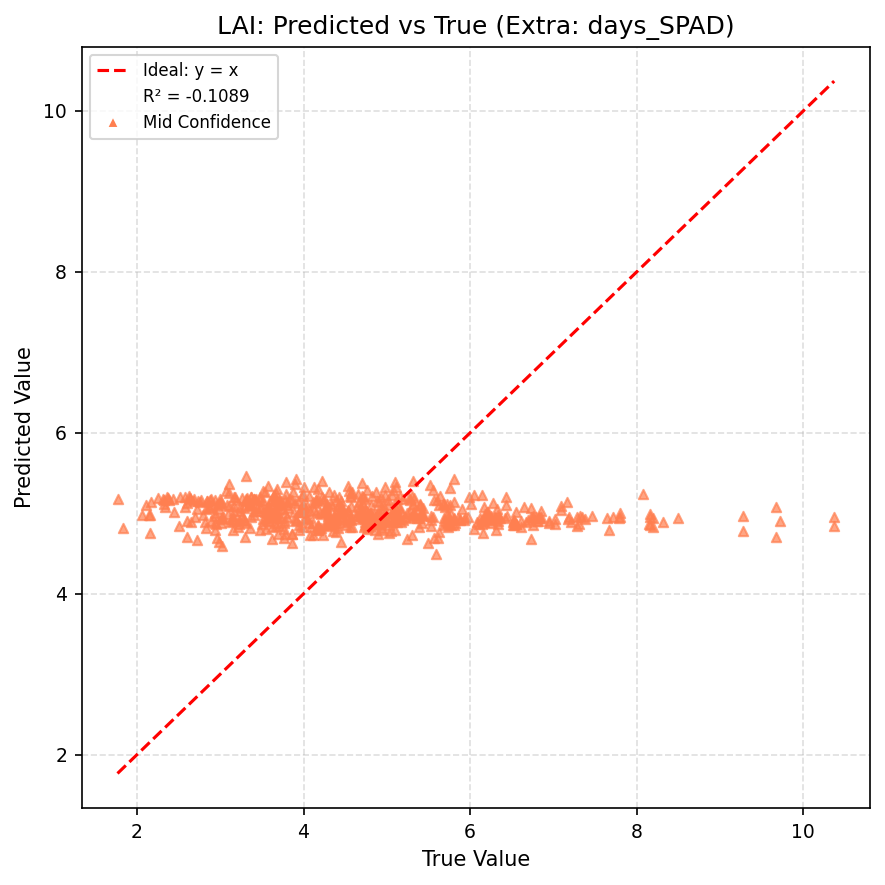


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
19 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_MaxViTConfidenceAddoneextrainput_SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  MaxViTConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.1146
MAE      : 1.2292
RMSE     : 1.5098


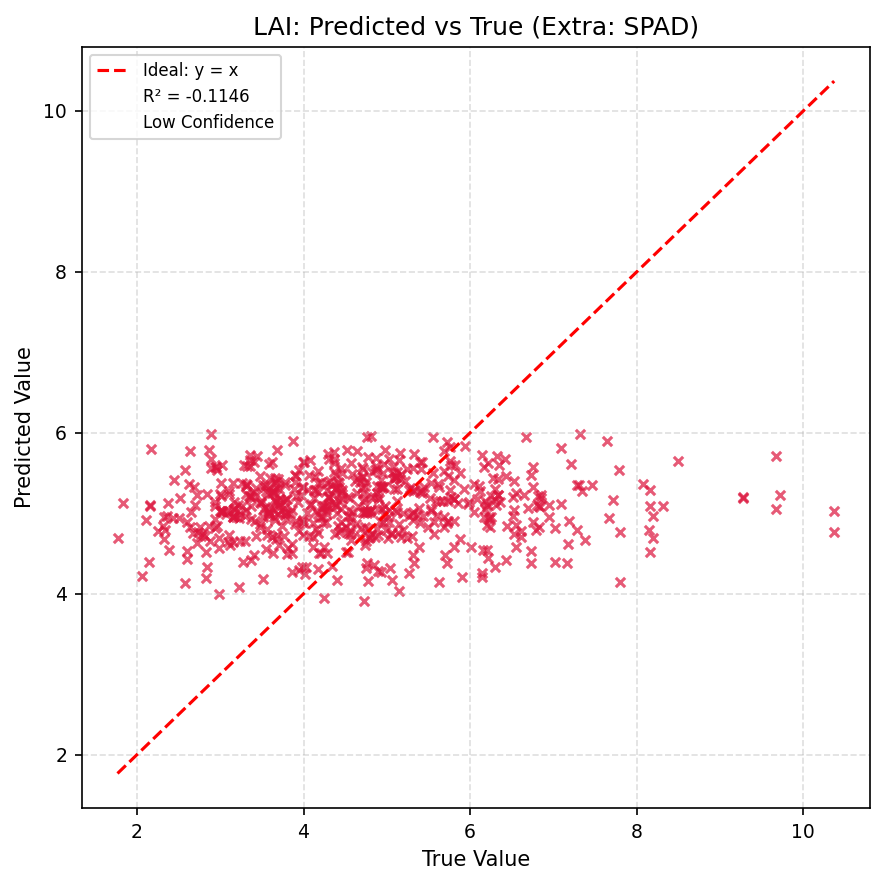


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
20 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_MaxViTConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  MaxViTConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -15.1084
MAE      : 5.5781
RMSE     : 5.7395


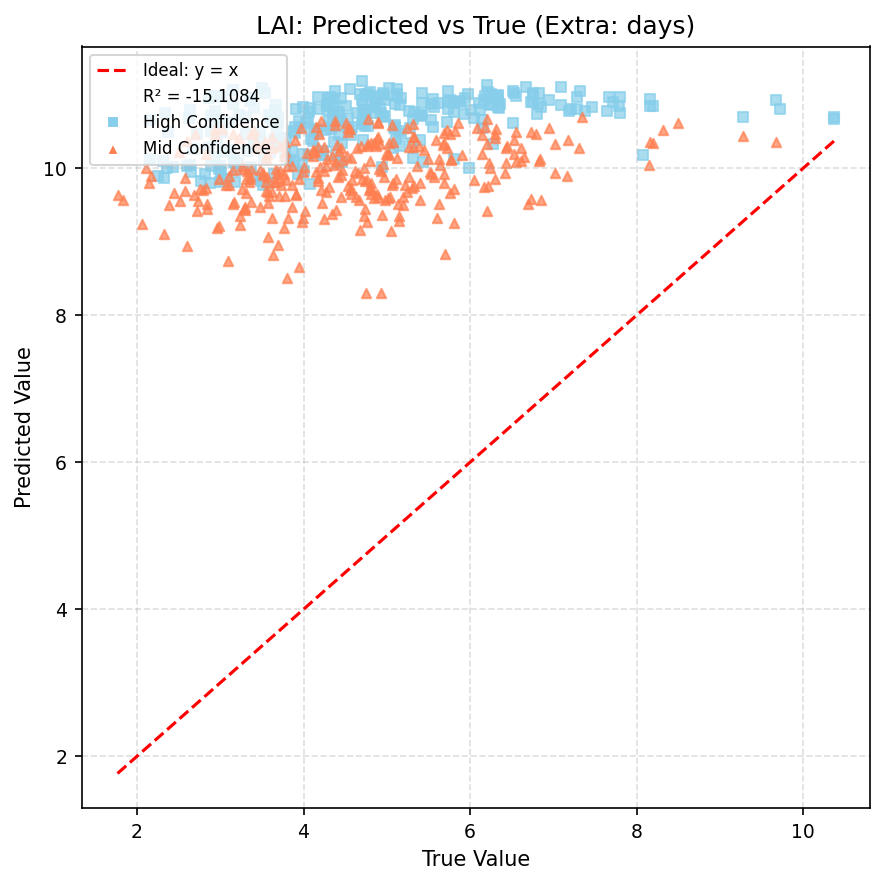


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
21 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_MaxViTConfidenceAddtwoextrainput_days-SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  MaxViTConfidenceAddtwoextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -32.9647
MAE      : 8.1895
RMSE     : 8.3341


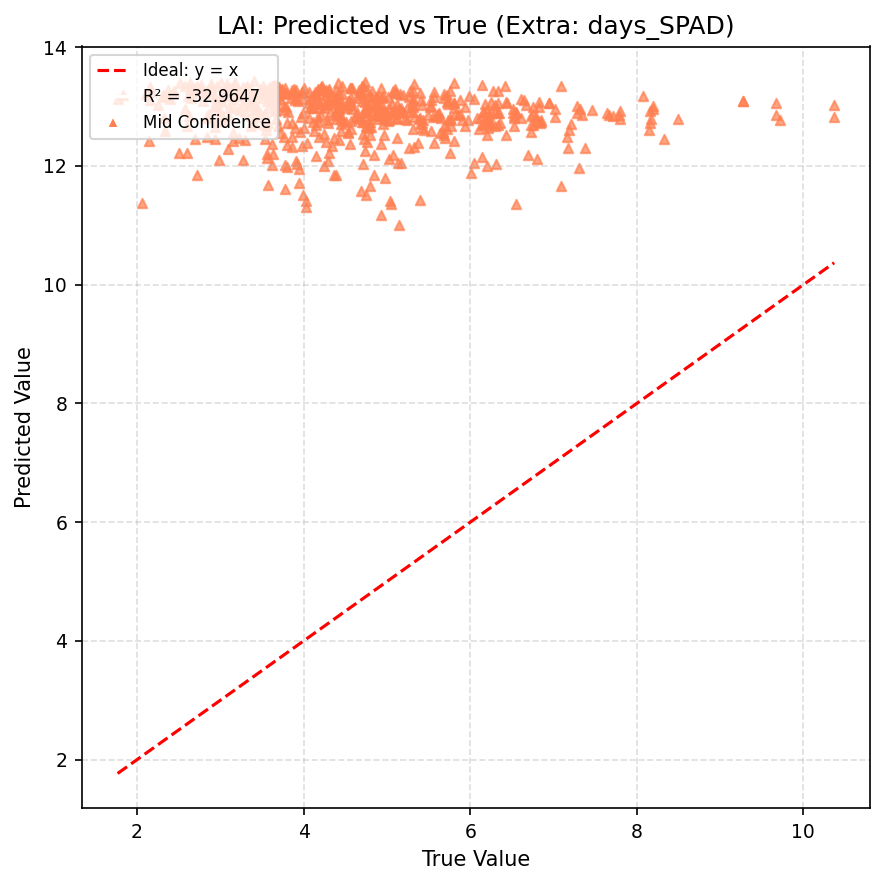


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
22 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_MobileOneConfidenceAddoneextrainput_SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  MobileOneConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -58.2392
MAE      : 10.9139
RMSE     : 11.0066


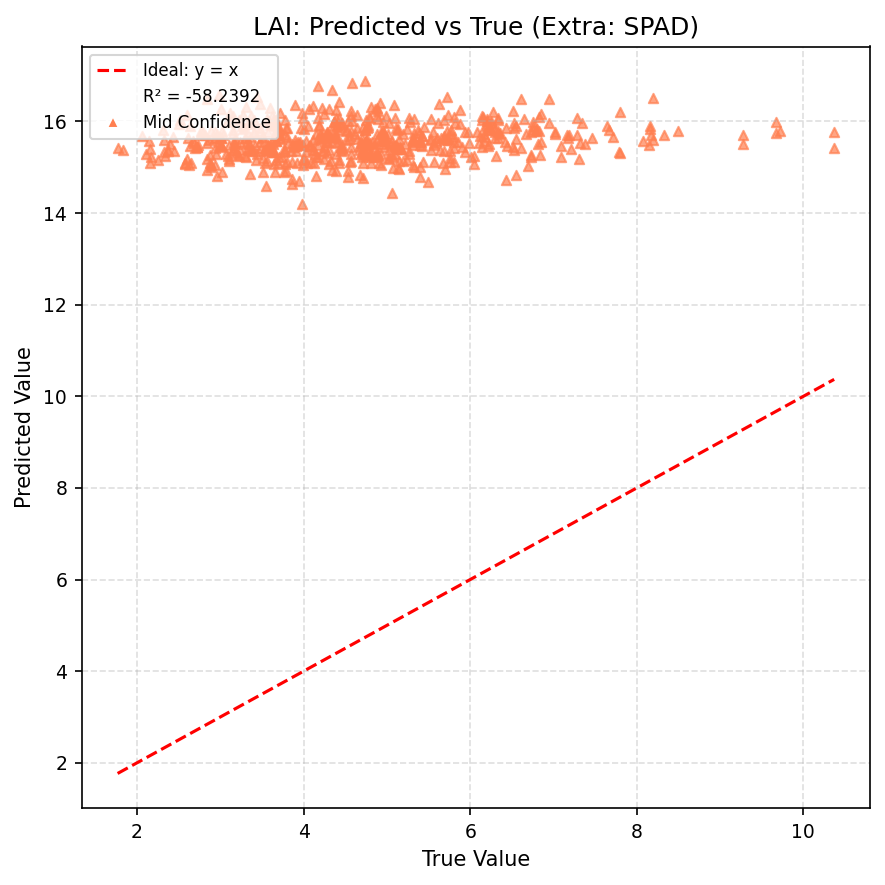


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
23 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_MobileOneConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  MobileOneConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.8238
MAE      : 1.6177
RMSE     : 1.9312


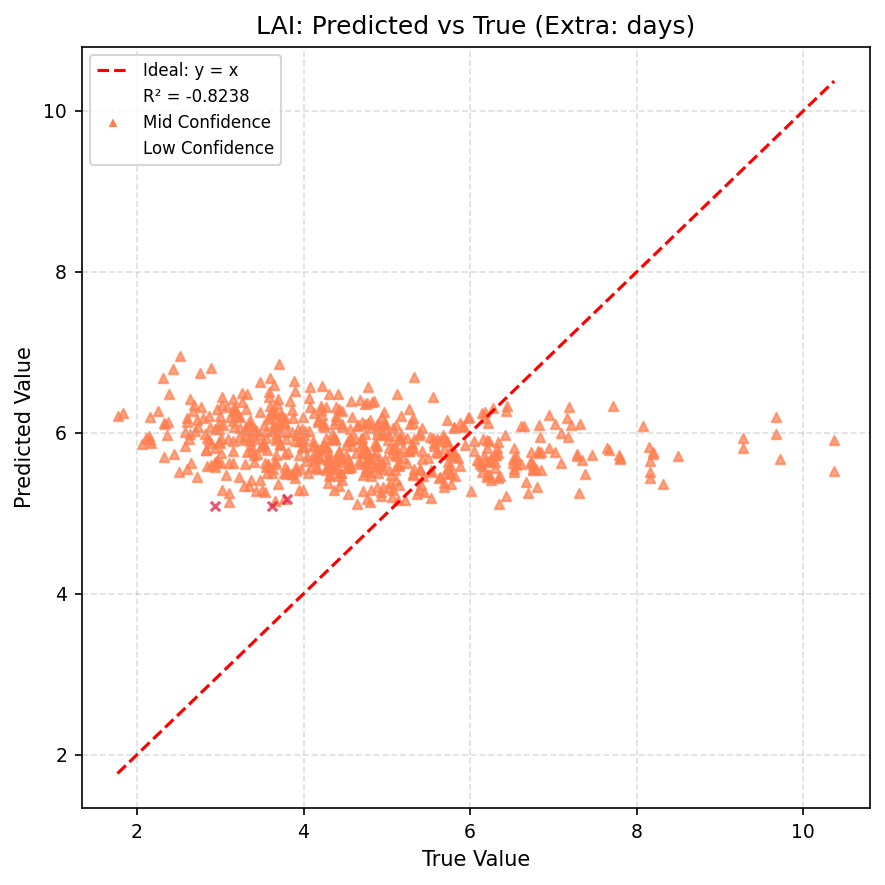


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
24 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_MobileOneConfidenceAddtwoextrainput_days-SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  MobileOneConfidenceAddtwoextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -1.7466
MAE      : 2.0448
RMSE     : 2.3700


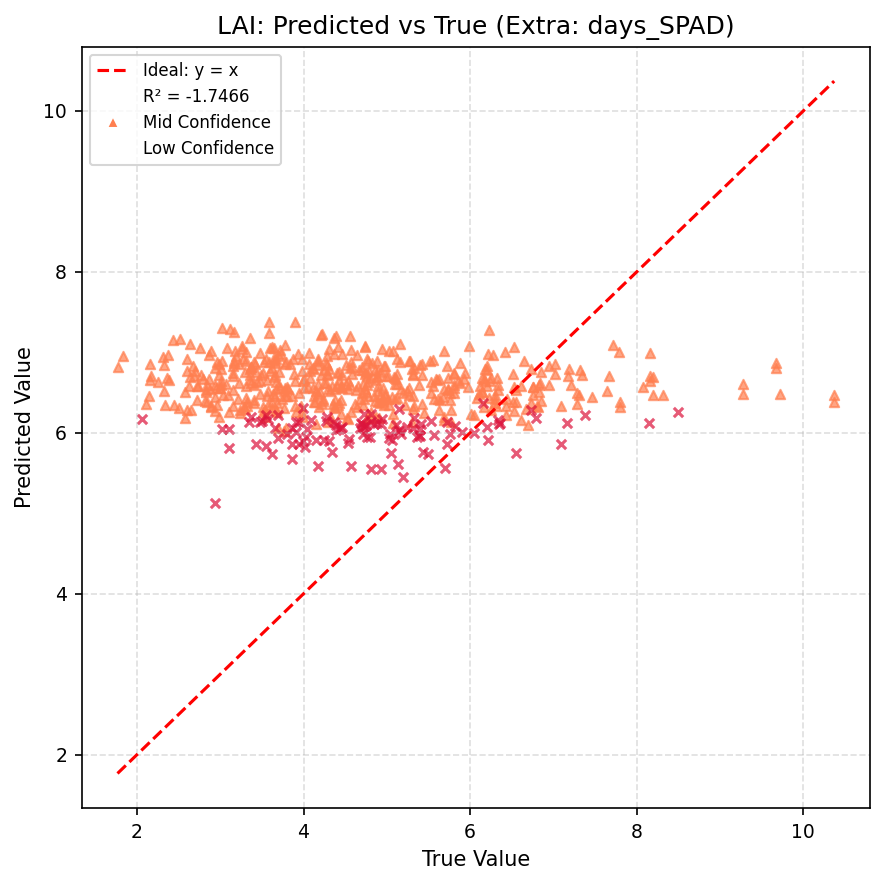


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
25 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_MobileViTV2ConfidenceAddoneextrainput_SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  MobileViTV2ConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -10.0164
MAE      : 4.5220
RMSE     : 4.7464


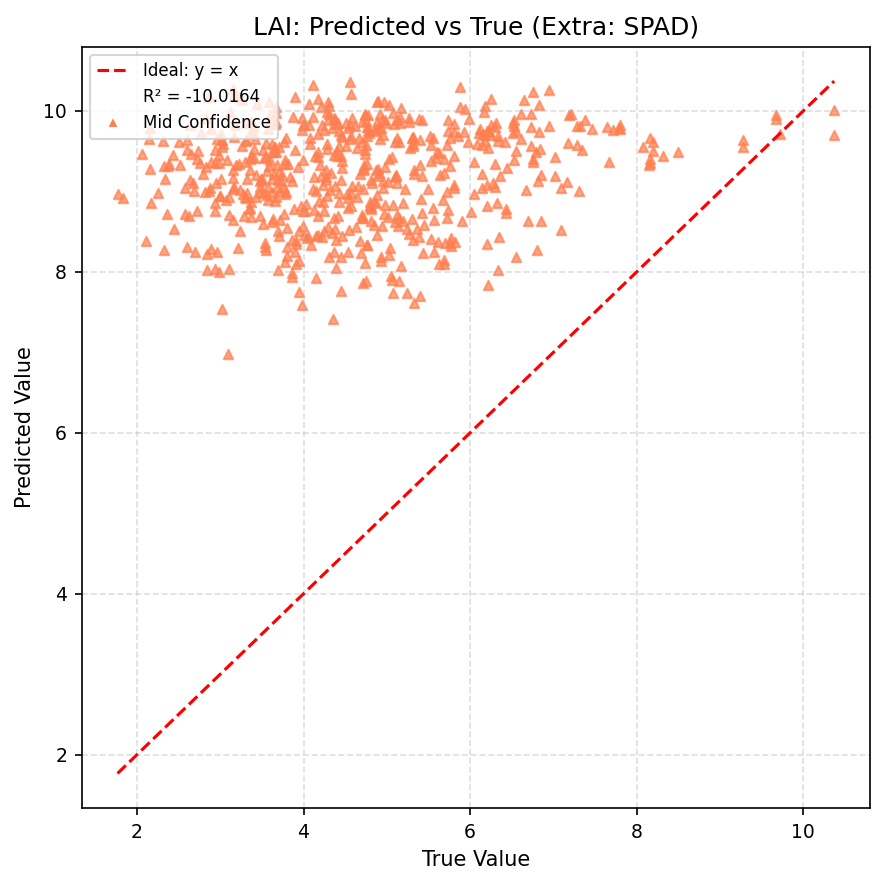


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
26 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_MobileViTV2ConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  MobileViTV2ConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -37.8469
MAE      : 8.7912
RMSE     : 8.9130


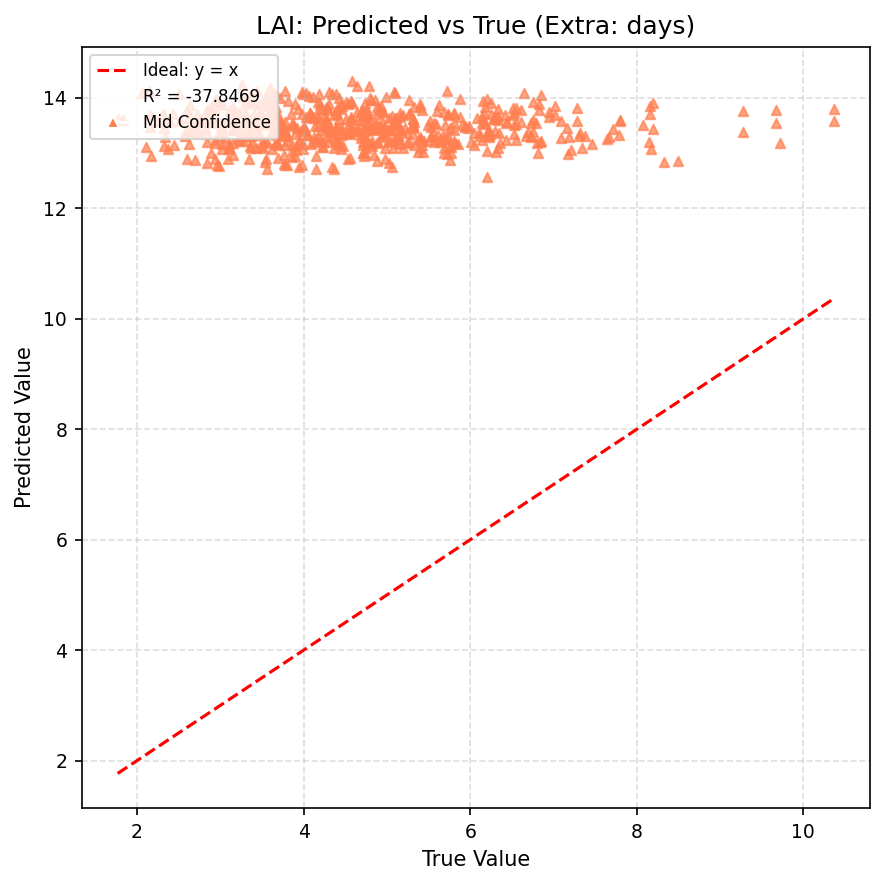


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
27 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_MobileViTV2ConfidenceAddtwoextrainput_days-SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  MobileViTV2ConfidenceAddtwoextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.0727
MAE      : 1.1831
RMSE     : 1.4811


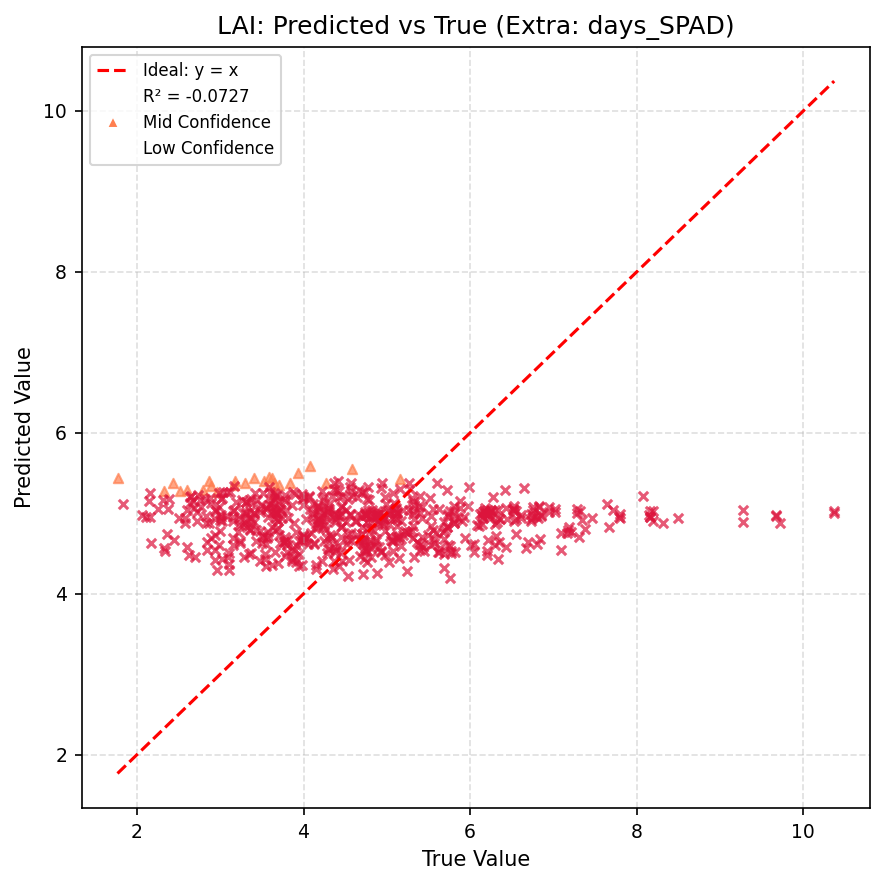


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
28 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_PoolFormerConfidenceAddOneExtraInput_SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  PoolFormerConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -13.4881
MAE      : 5.2380
RMSE     : 5.4432


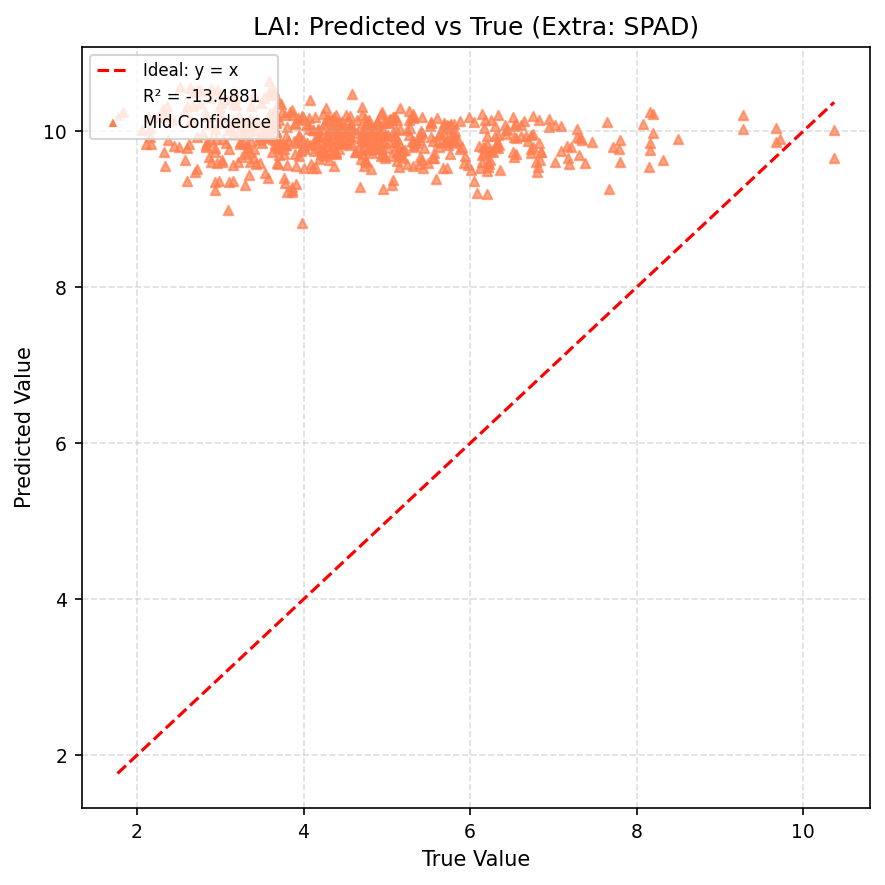


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
29 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_PoolFormerConfidenceAddOneExtraInput_days_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  PoolFormerConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -23.5549
MAE      : 6.9417
RMSE     : 7.0862


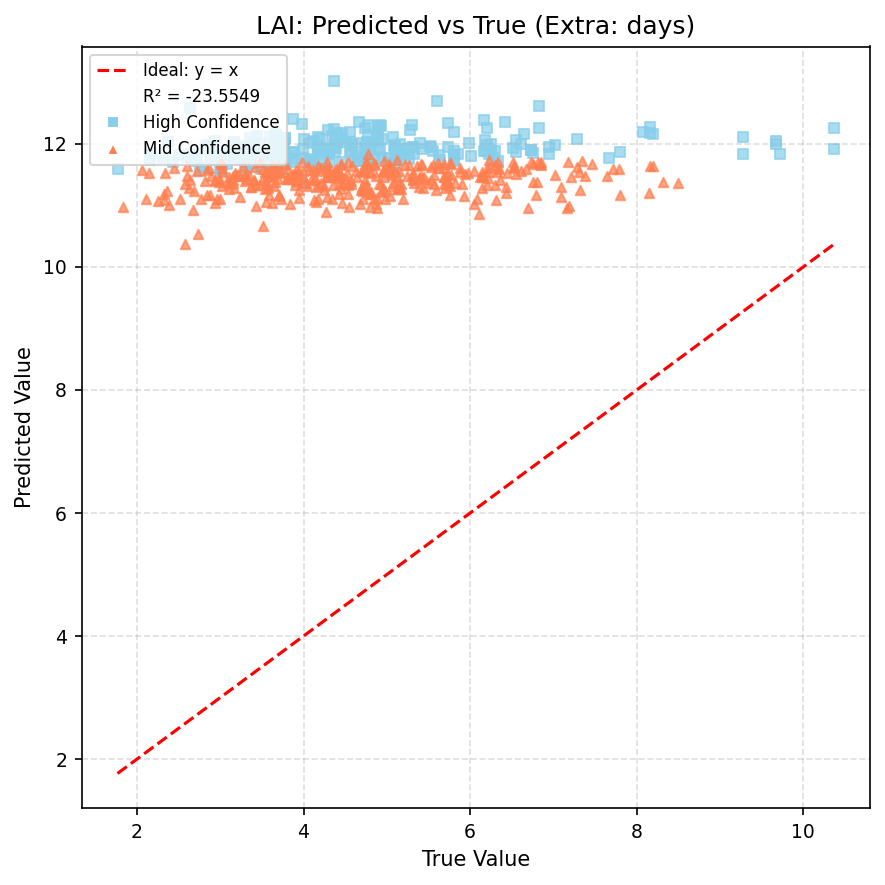


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
30 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_PoolFormerConfidenceAddTwoExtraInput_days-SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  PoolFormerConfidenceAddTwoExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -9.1010
MAE      : 4.3266
RMSE     : 4.5450


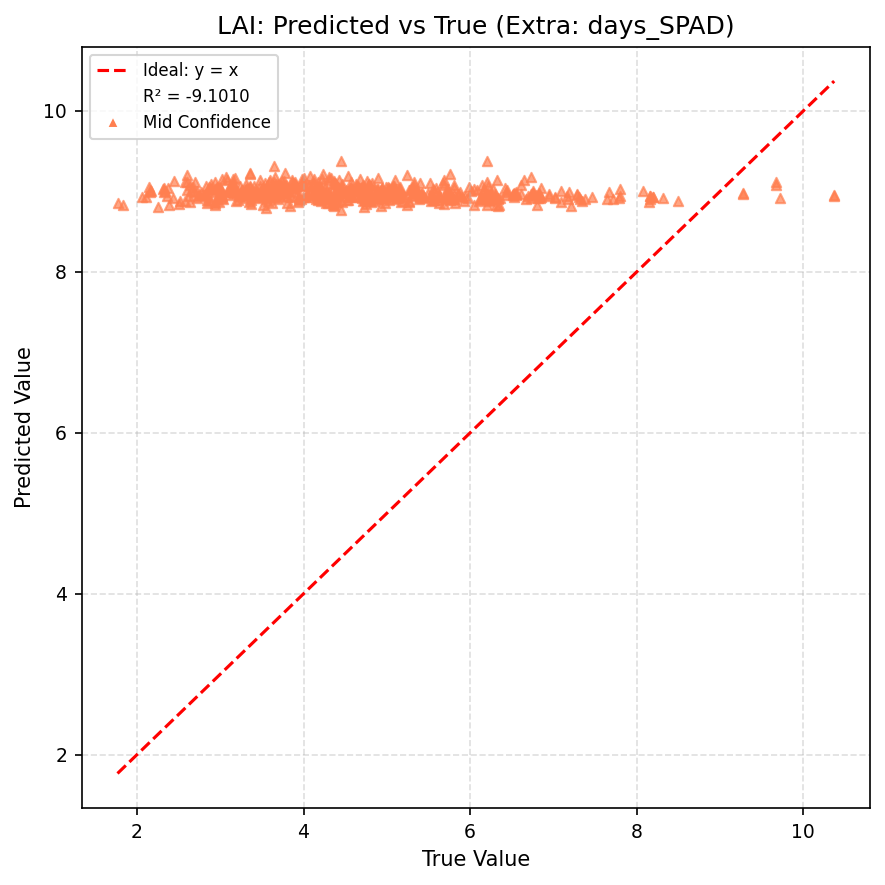


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
31 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_RegNetY8GFConfidenceAddoneextrainput_SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  RegNetY8GFConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -3.4995
MAE      : 2.7034
RMSE     : 3.0334


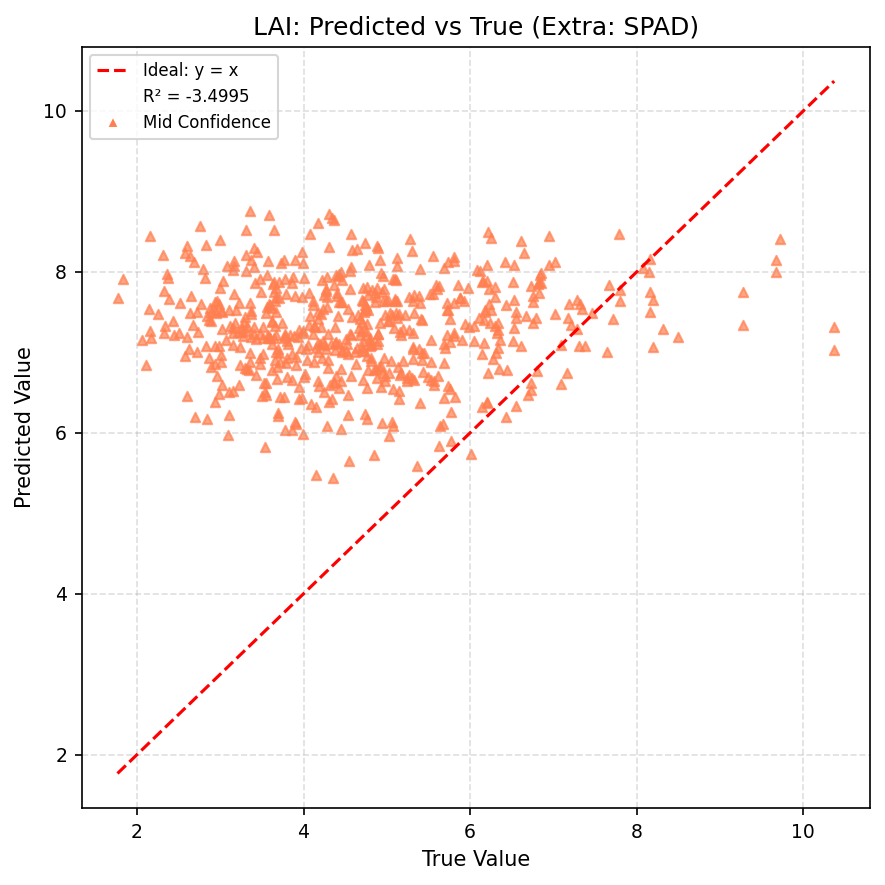


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
32 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_RegNetY8GFConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  RegNetY8GFConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -3.0918
MAE      : 2.5547
RMSE     : 2.8927


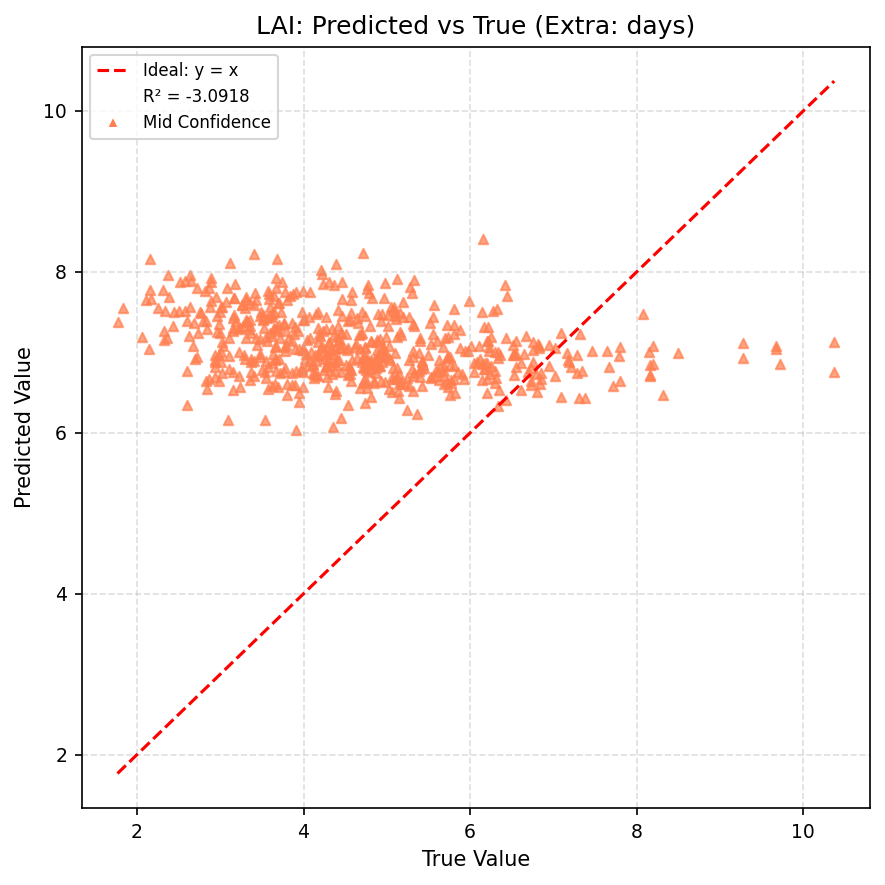


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
33 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_RegNetYConfidenceAdd2Inputs_days-SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  RegNetYConfidenceAdd2Inputs
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -5.6531
MAE      : 3.3891
RMSE     : 3.6886


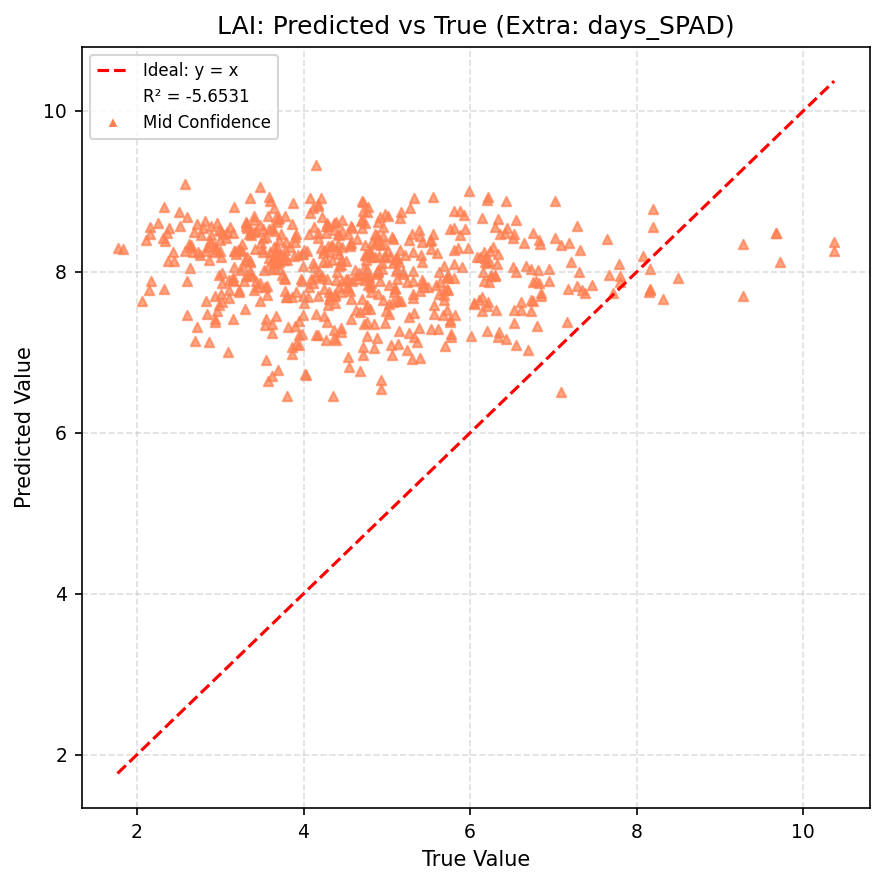


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
34 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_RepVGGA1ConfidenceAdd2Inputs_days-SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  RepVGGA1ConfidenceAdd2Inputs
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -8.8481
MAE      : 4.2495
RMSE     : 4.4877


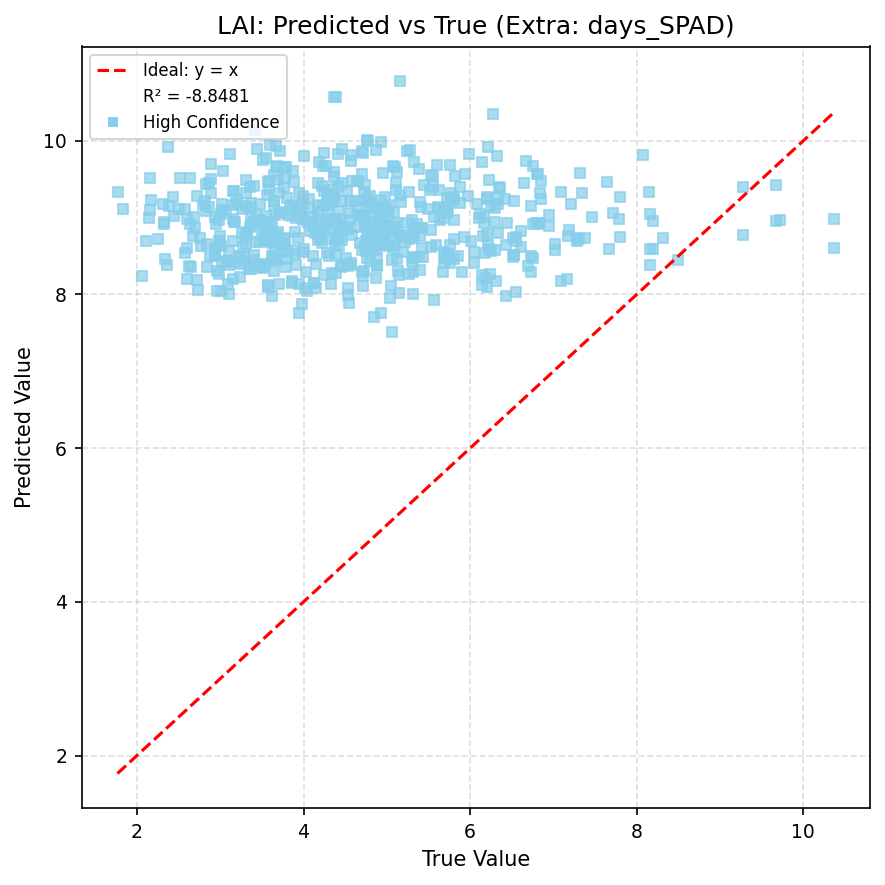


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
35 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_RepVGGA1ConfidenceAddoneextrainput_SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  RepVGGA1ConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -3.7074
MAE      : 2.5756
RMSE     : 3.1027


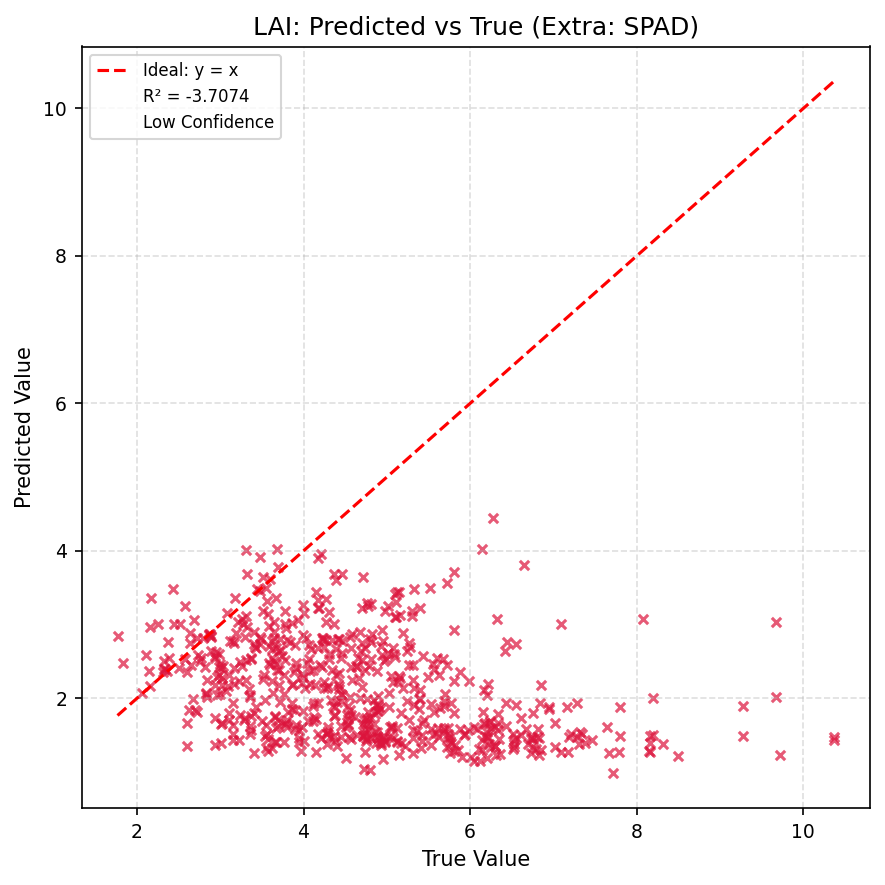


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
36 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_RepVGGA1ConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  RepVGGA1ConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.1972
MAE      : 1.2924
RMSE     : 1.5647


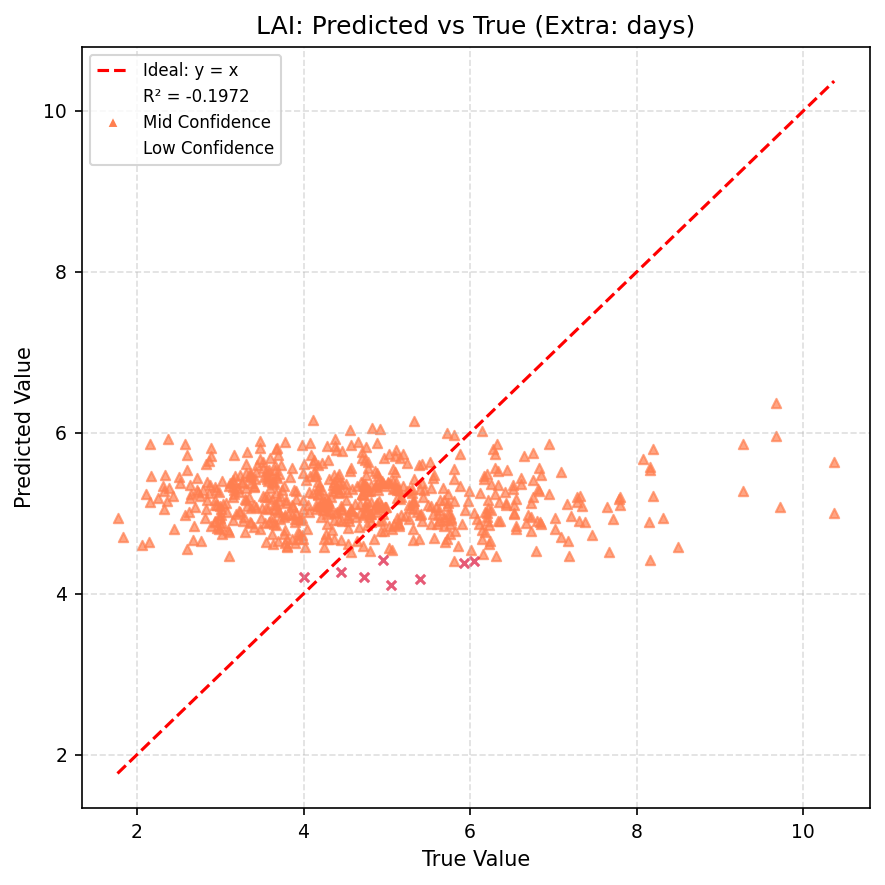


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
37 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_SwinV2ConfidenceAddOneExtraInput_SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  SwinV2ConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -139.9845
MAE      : 16.9177
RMSE     : 16.9798


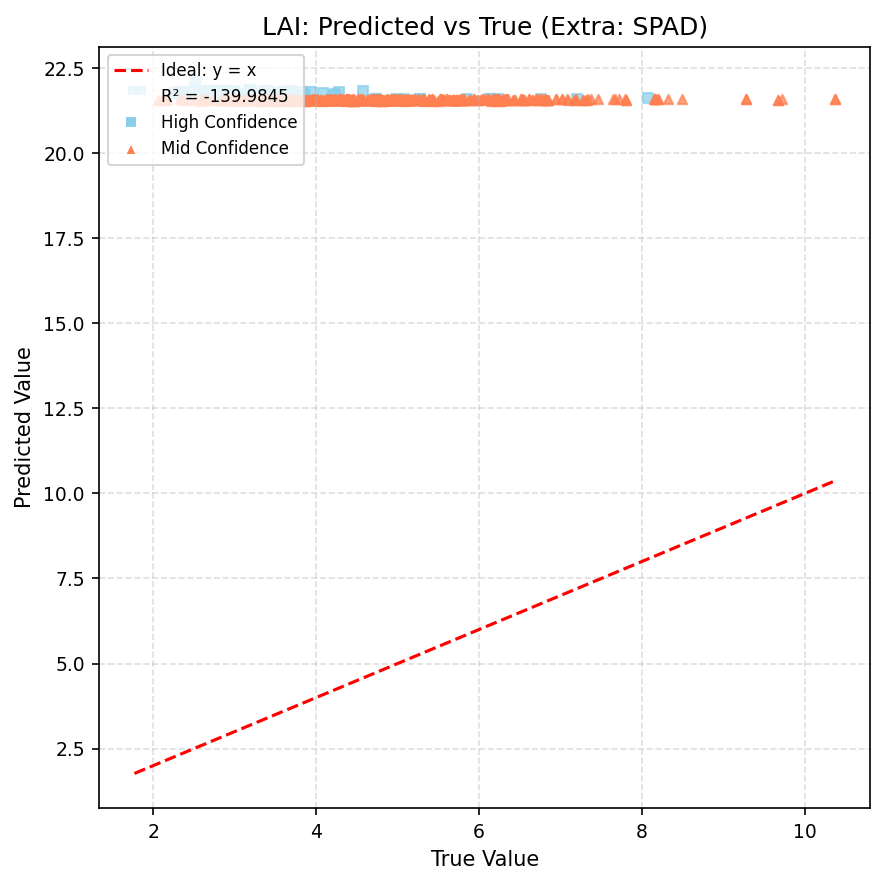


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
38 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_SwinV2ConfidenceAddOneExtraInput_days_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  SwinV2ConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -50.6985
MAE      : 10.1703
RMSE     : 10.2822


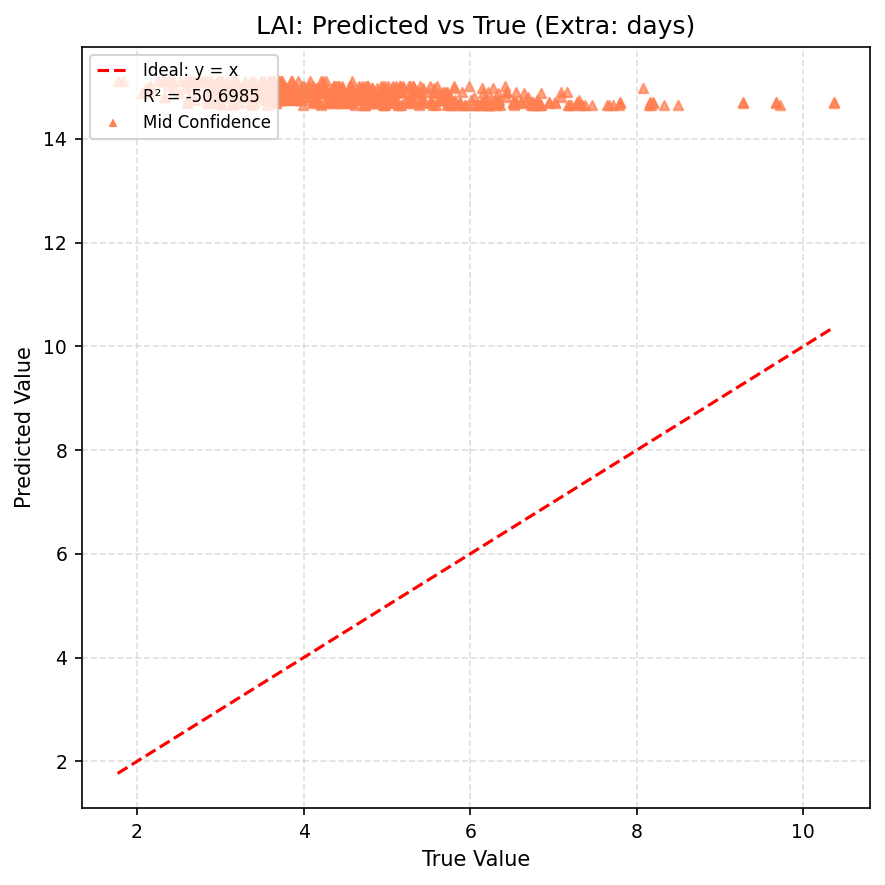


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
39 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/LAI_SwinV2ConfidenceAddTwoExtraInput_days-SPAD_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  SwinV2ConfidenceAddTwoExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -68.6047
MAE      : 11.8356
RMSE     : 11.9307


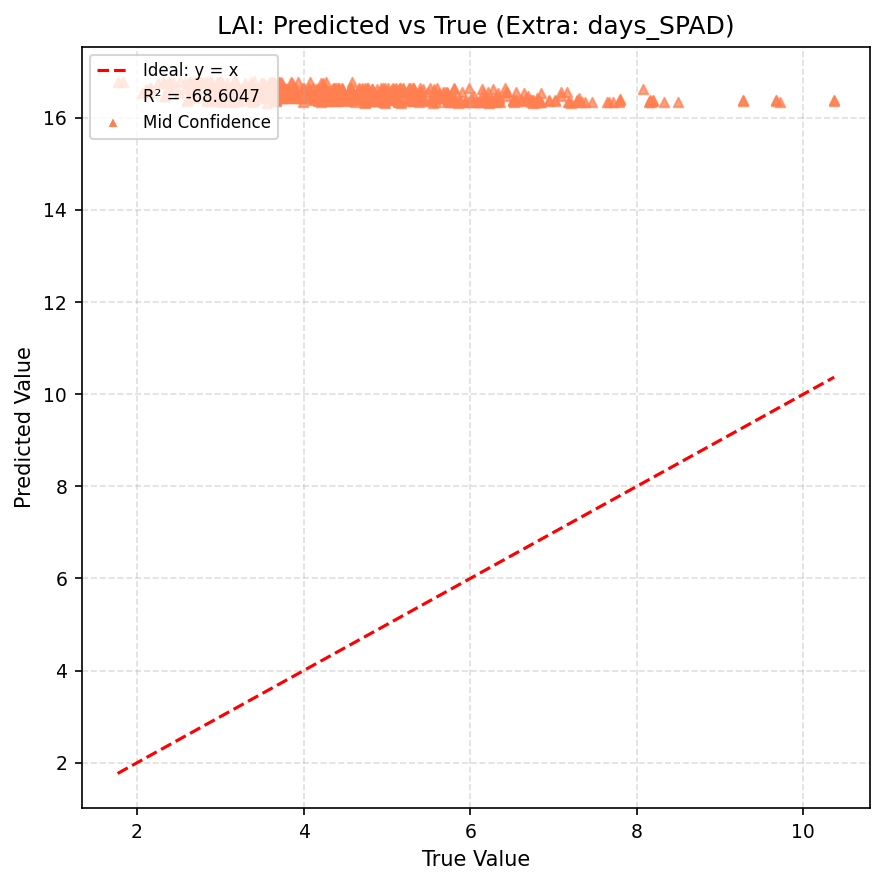


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
40 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_CoAtNetConfidenceAddOneExtraInput_days_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  CoAtNetConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.2291
MAE      : 8.1307
RMSE     : 11.2770


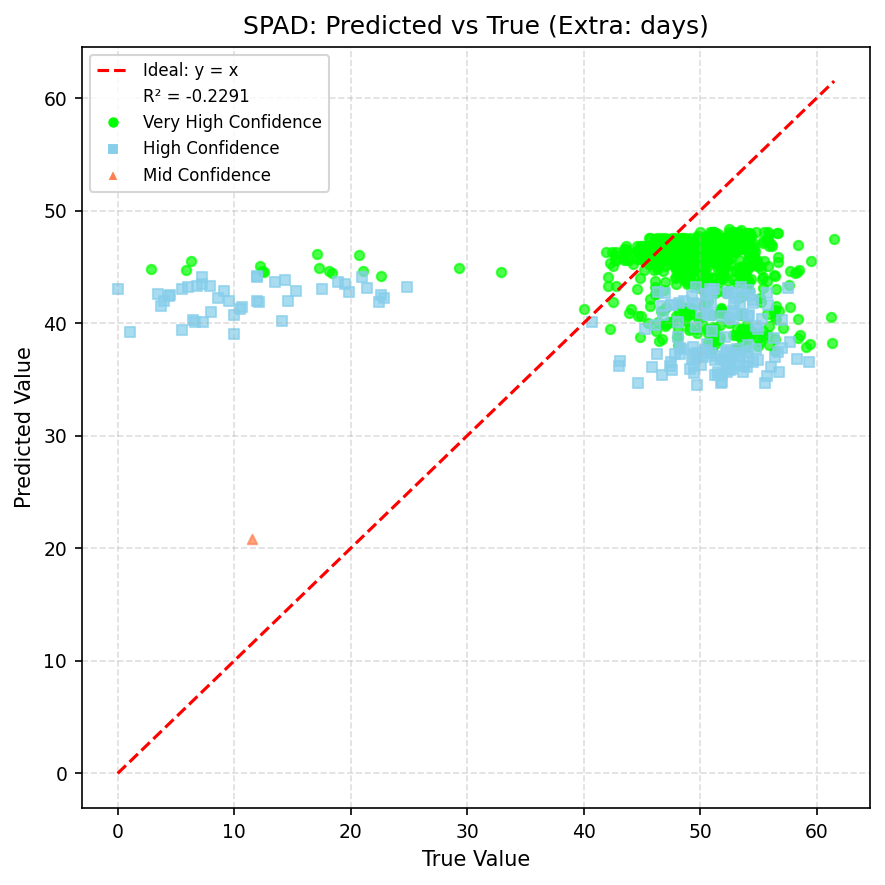


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
41 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_CoAtNetConfidenceAddTwoExtraInput_days-LAI_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  SPAD
modelBackbone:  CoAtNetConfidenceAddTwoExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.1847
MAE      : 8.0842
RMSE     : 10.8240


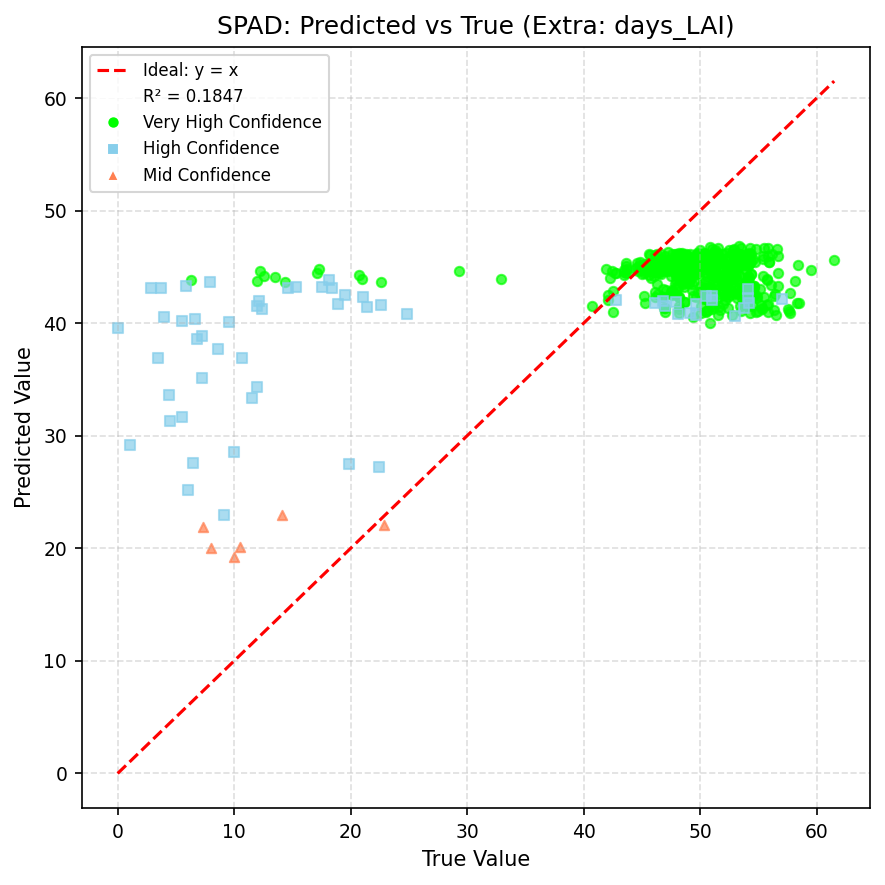


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
42 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_ConvNeXtTinyConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  ConvNeXtTinyConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.0638
MAE      : 6.3341
RMSE     : 10.4913


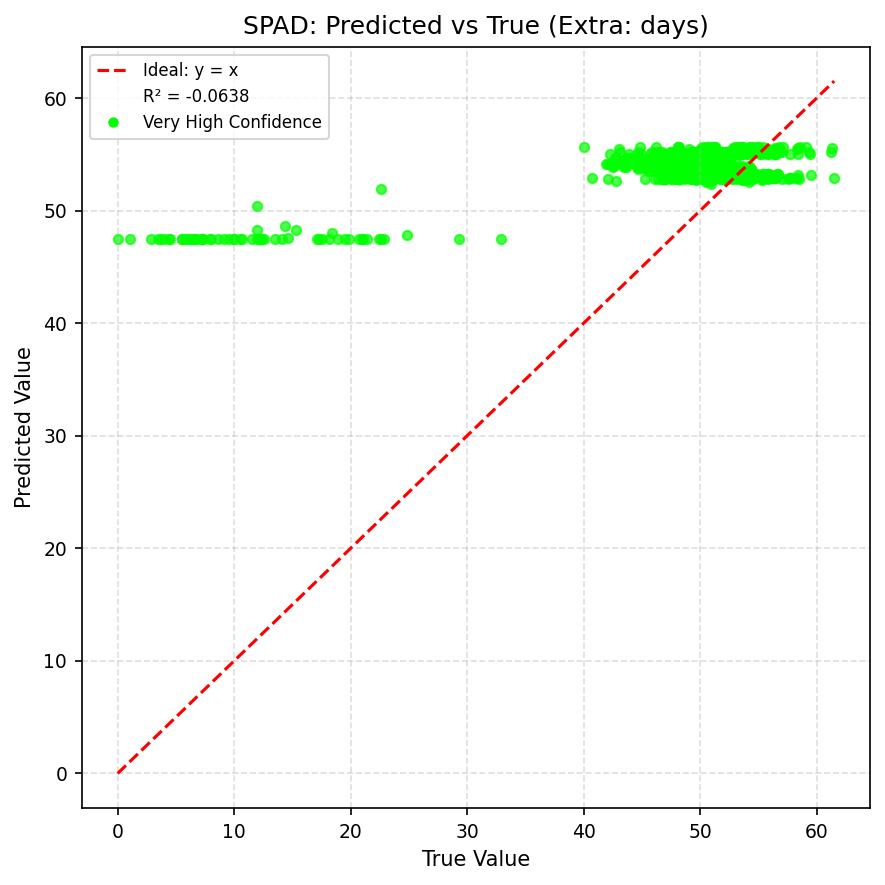


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
43 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_ConvNeXtTinyConfidenceAddtwoextrainput_days-LAI_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  SPAD
modelBackbone:  ConvNeXtTinyConfidenceAddtwoextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.0343
MAE      : 7.3483
RMSE     : 11.7805


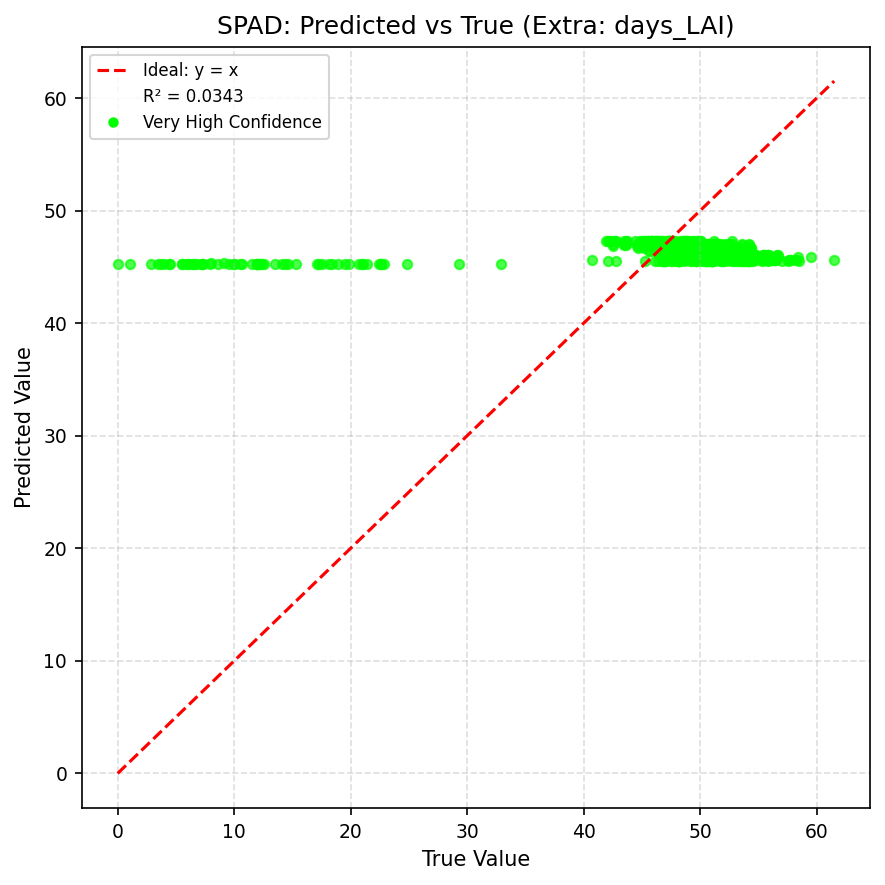


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
44 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_DenseNetConfidenceAdd2Inputs_days-LAI_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  SPAD
modelBackbone:  DenseNetConfidenceAdd2Inputs
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.5858
MAE      : 4.0645
RMSE     : 7.7147


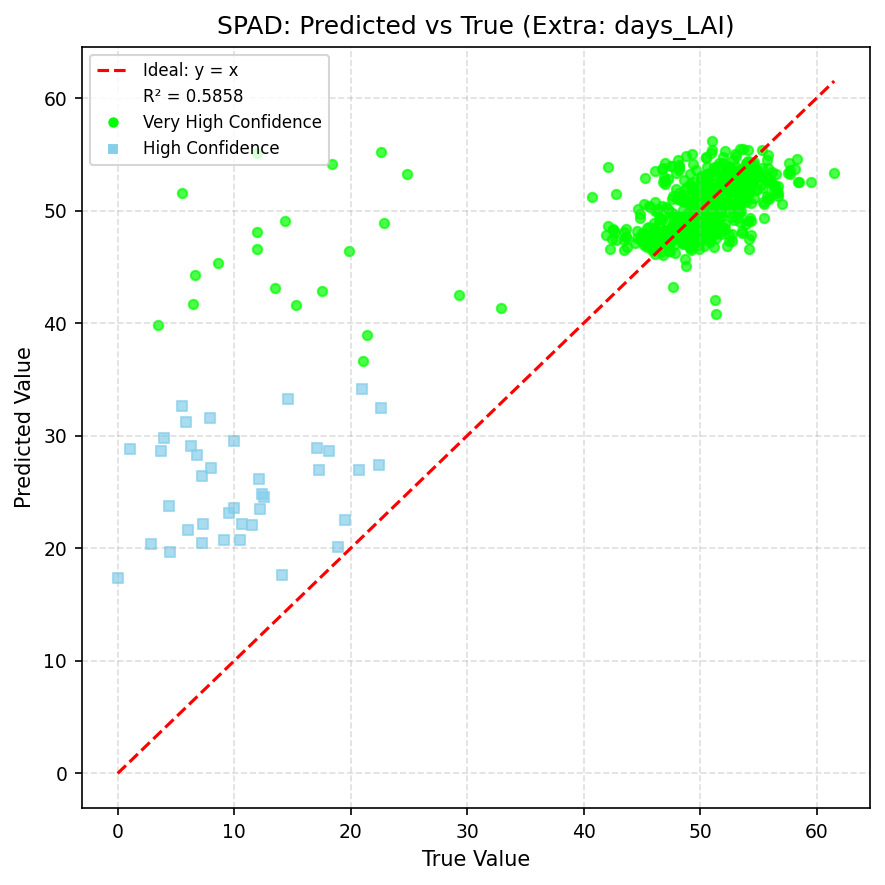


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
45 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_DenseNetConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  DenseNetConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -5.1231
MAE      : 24.3634
RMSE     : 25.1700


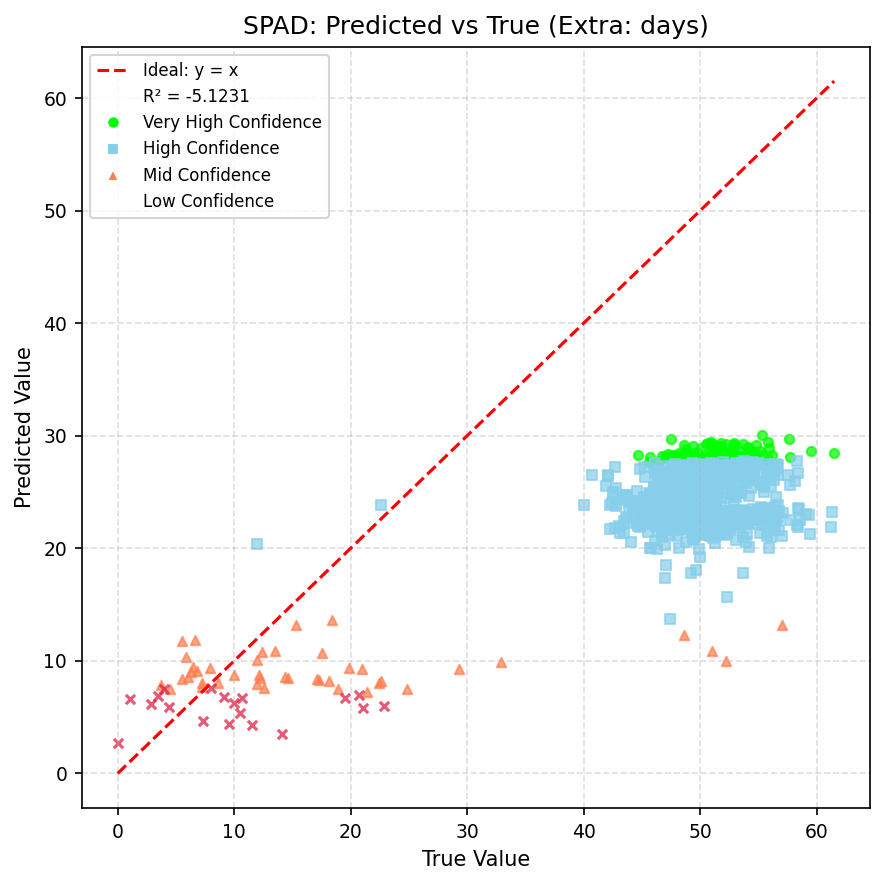


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
46 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_EfficientFormerConfidenceAddOneExtraInput_days_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  EfficientFormerConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.0455
MAE      : 5.8065
RMSE     : 10.4006


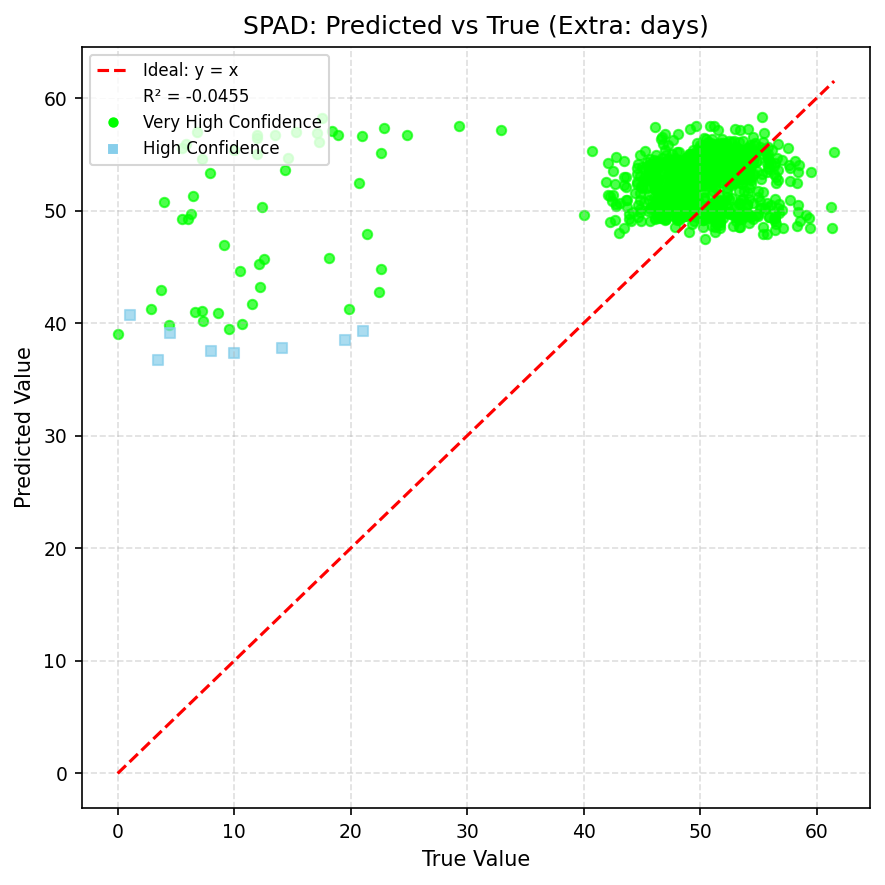


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
47 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_EfficientFormerConfidenceAddTwoExtraInput_days-LAI_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  SPAD
modelBackbone:  EfficientFormerConfidenceAddTwoExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.1567
MAE      : 6.0736
RMSE     : 11.0087


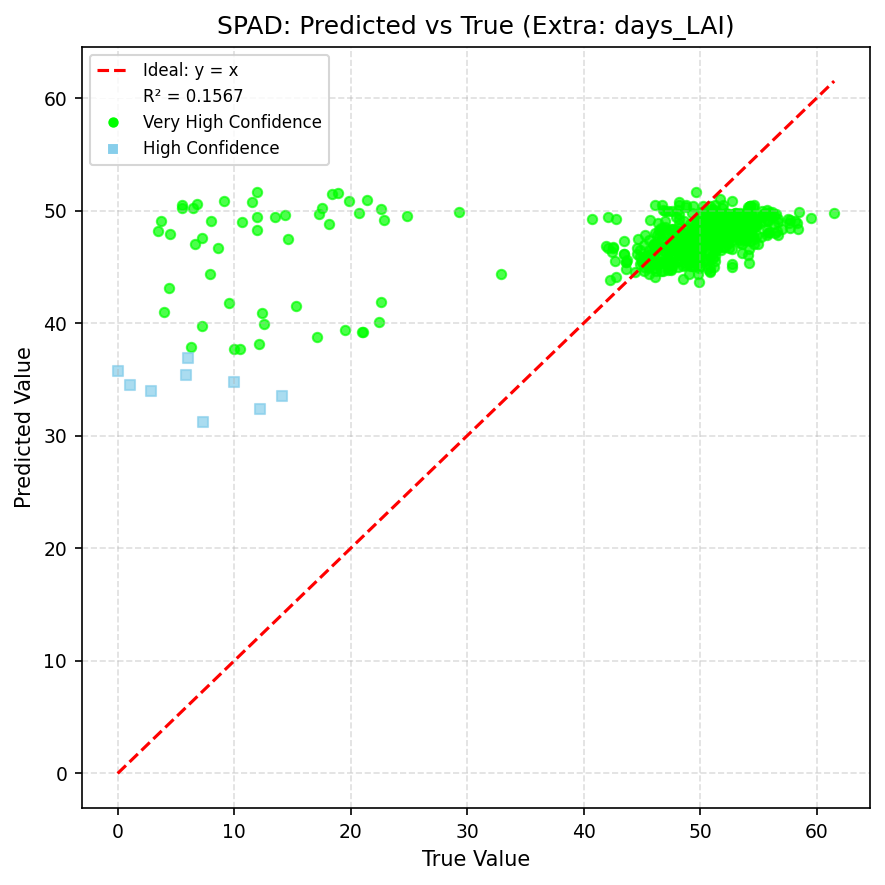


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
48 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_EfficientNetV2MConfidenceAdd2Inputs_days-LAI_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  SPAD
modelBackbone:  EfficientNetV2MConfidenceAdd2Inputs
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.2397
MAE      : 6.2258
RMSE     : 10.4525


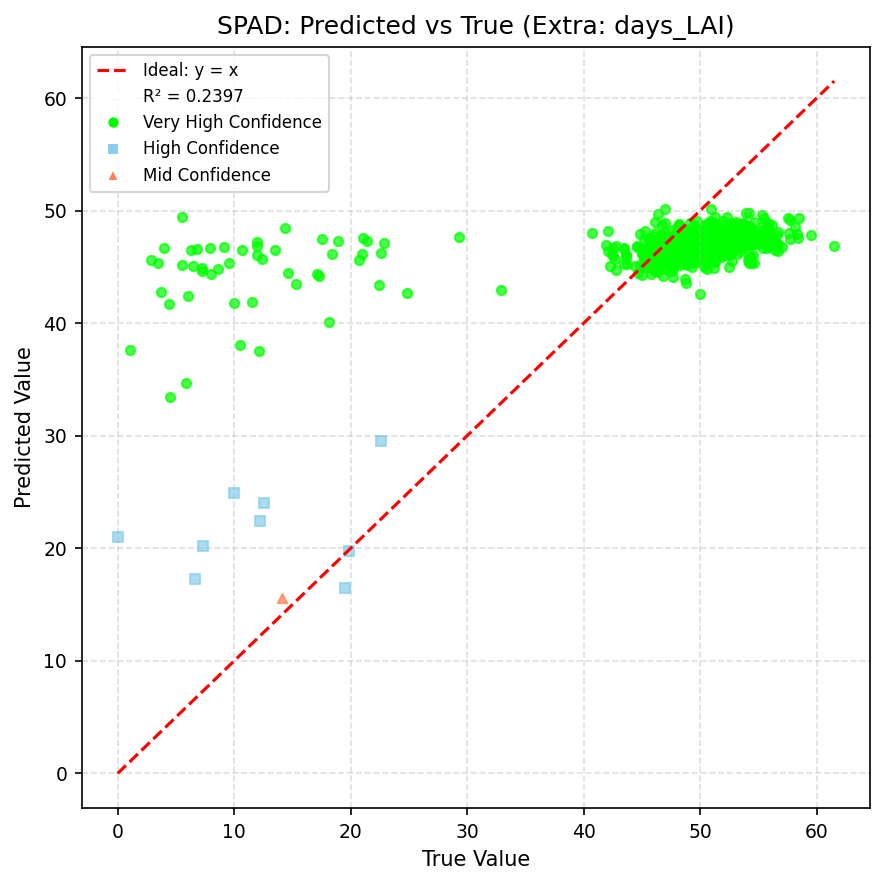


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
49 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_EfficientNetV2MConfidenceAddeonextrainput_days_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  EfficientNetV2MConfidenceAddeonextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.3220
MAE      : 6.9375
RMSE     : 8.3752


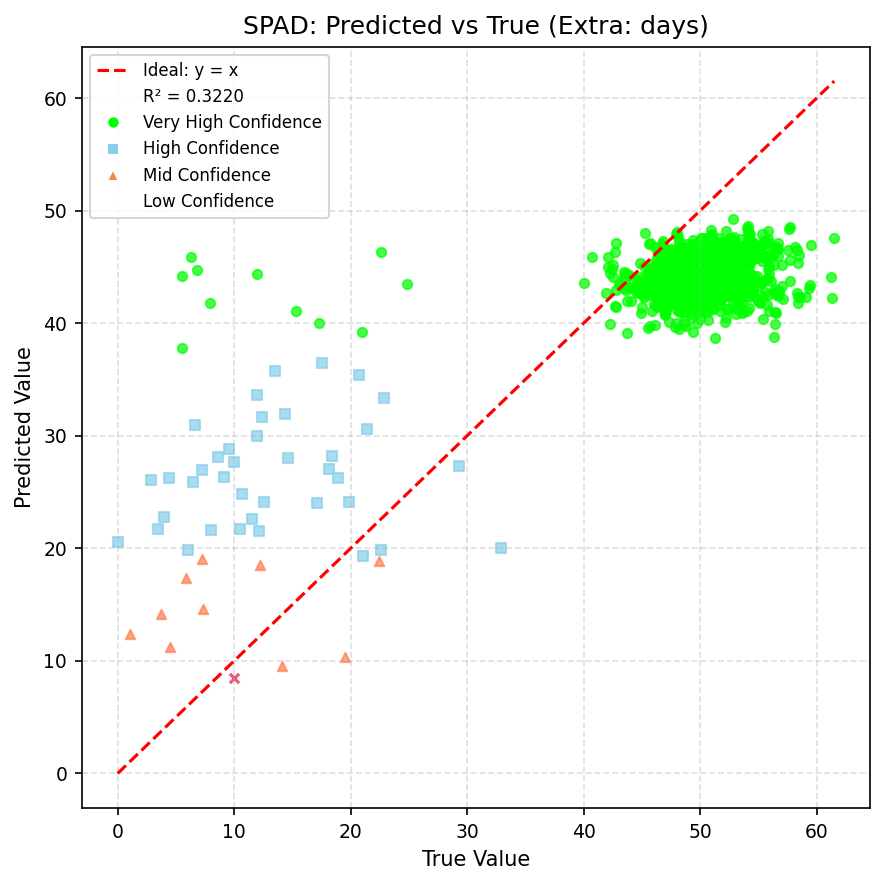


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
50 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_FocalNetConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  FocalNetConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.6177
MAE      : 8.4210
RMSE     : 12.9372


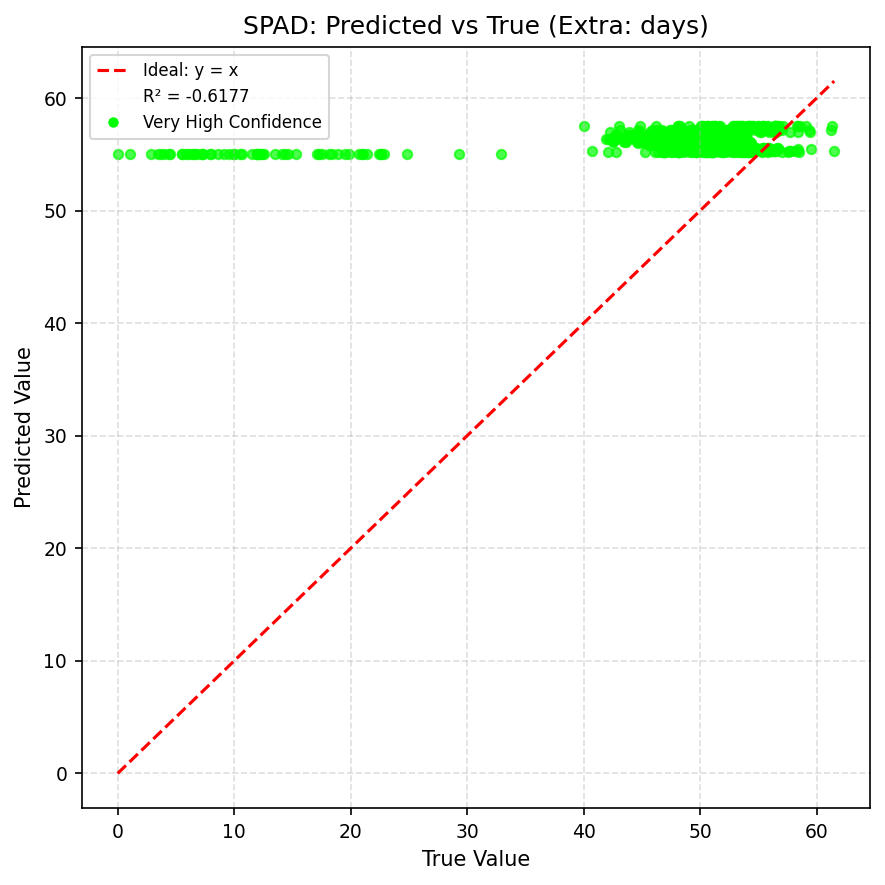


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
51 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_FocalNetConfidenceAddtwoextrainput_days-LAI_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  SPAD
modelBackbone:  FocalNetConfidenceAddtwoextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.8425
MAE      : 10.7940
RMSE     : 16.2719


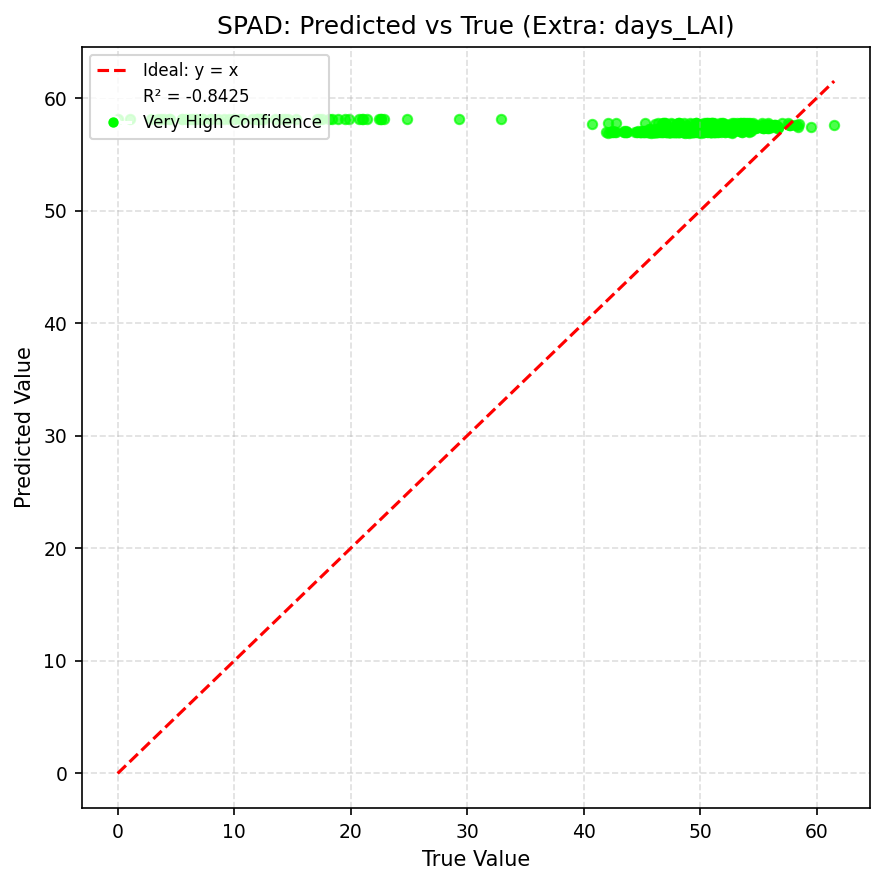


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
52 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_MaxViTConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  MaxViTConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.0900
MAE      : 5.5973
RMSE     : 9.7031


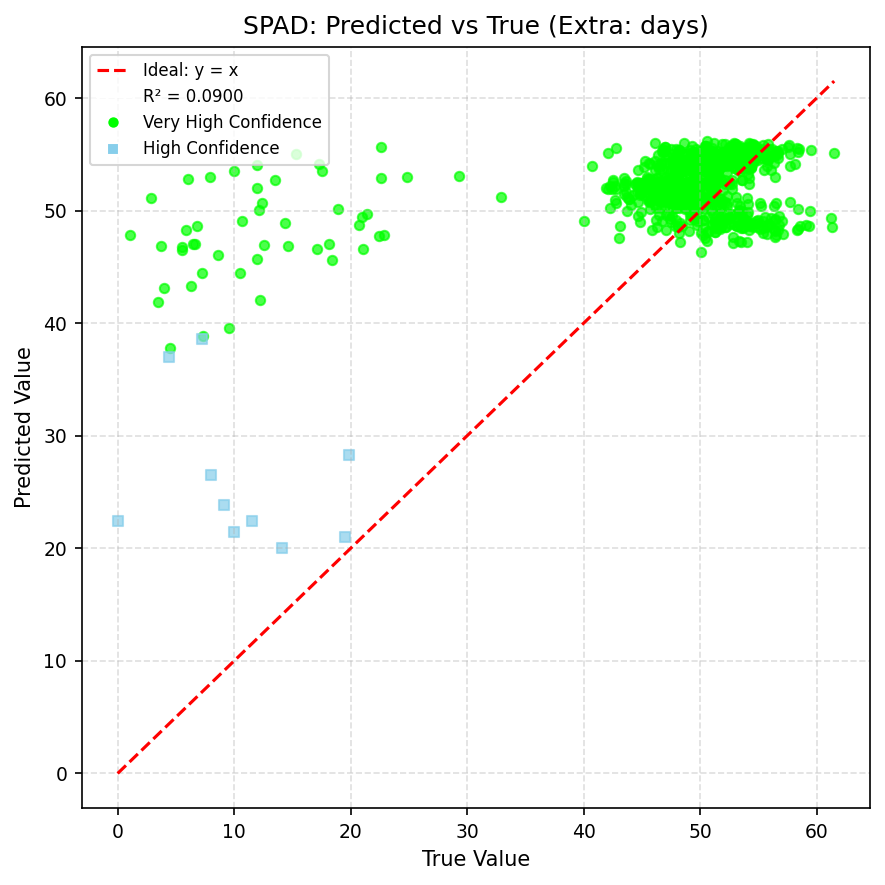


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
53 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_MaxViTConfidenceAddtwoextrainput_days-LAI_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  SPAD
modelBackbone:  MaxViTConfidenceAddtwoextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.6929
MAE      : 4.4785
RMSE     : 6.6435


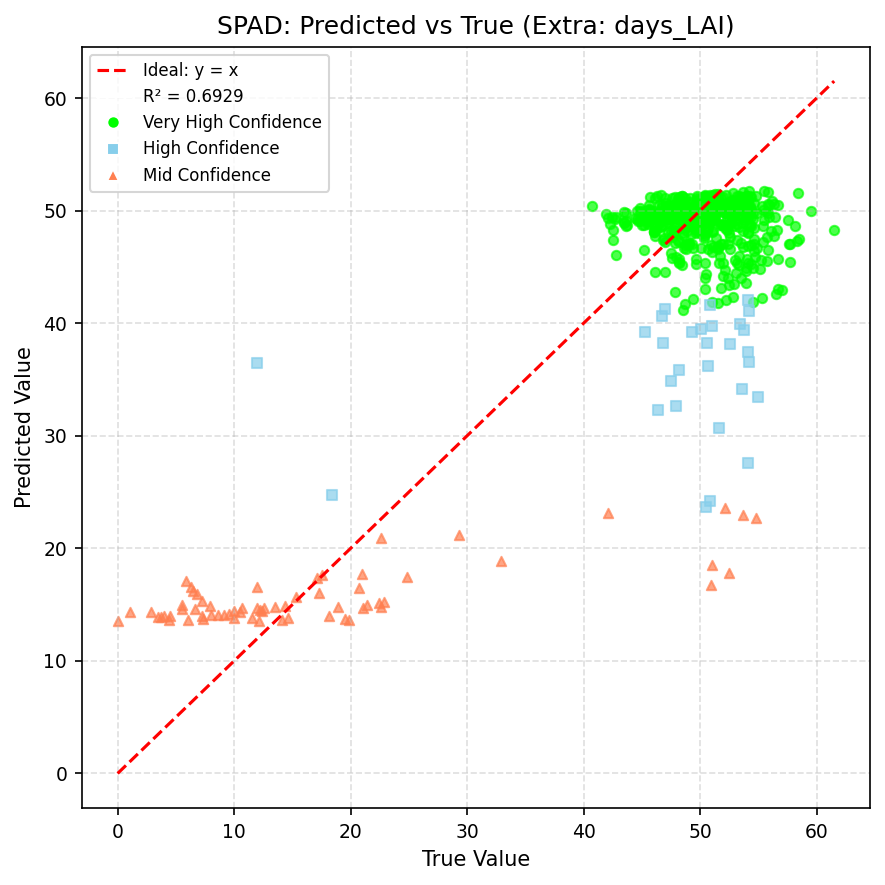


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
54 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_MobileOneConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  MobileOneConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.7847
MAE      : 3.6318
RMSE     : 4.7199


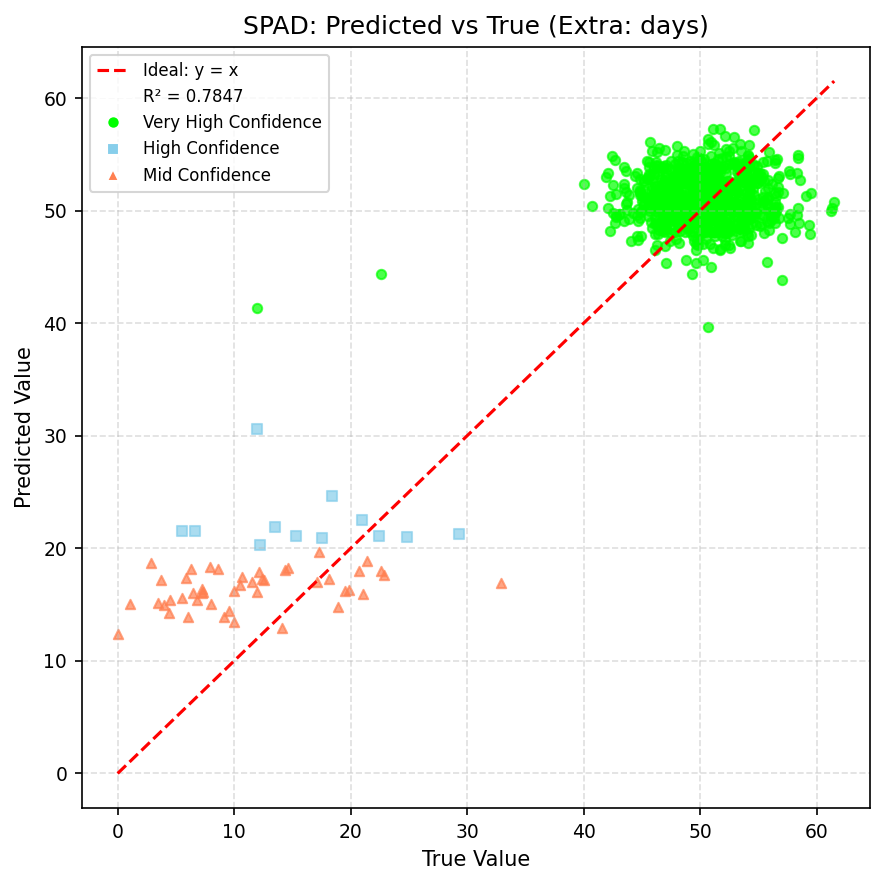


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
55 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_MobileOneConfidenceAddtwoextrainput_days-LAI_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  SPAD
modelBackbone:  MobileOneConfidenceAddtwoextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.7640
MAE      : 4.3141
RMSE     : 5.8241


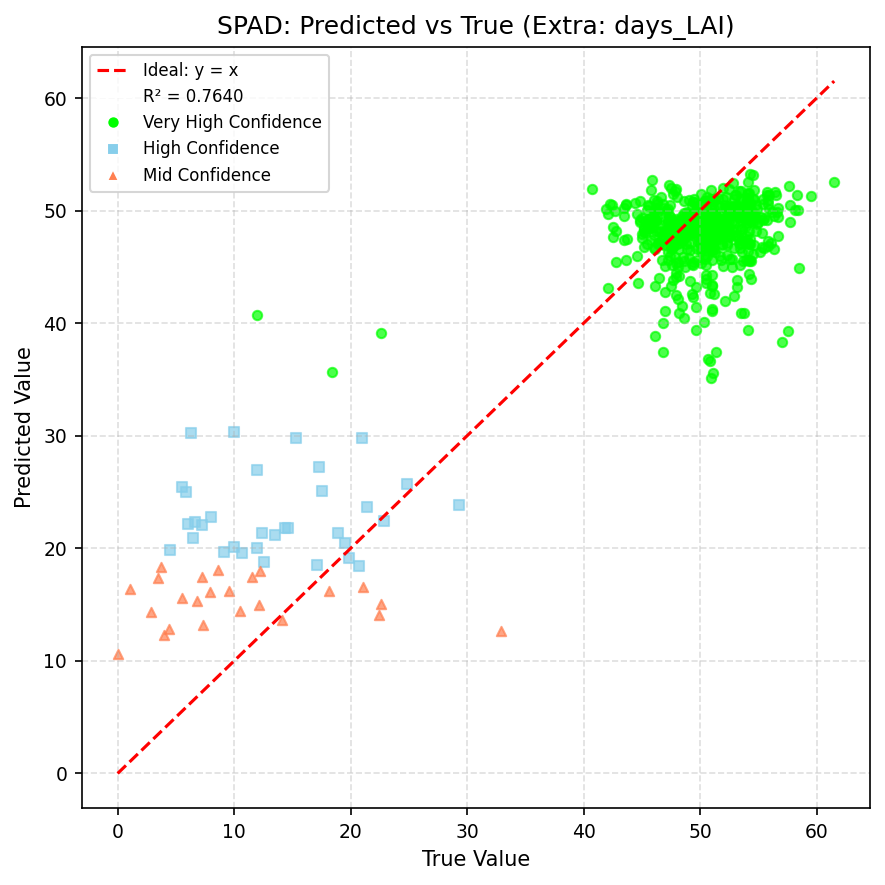


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
56 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_MobileViTV2ConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  MobileViTV2ConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -1.5160
MAE      : 12.9212
RMSE     : 16.1345


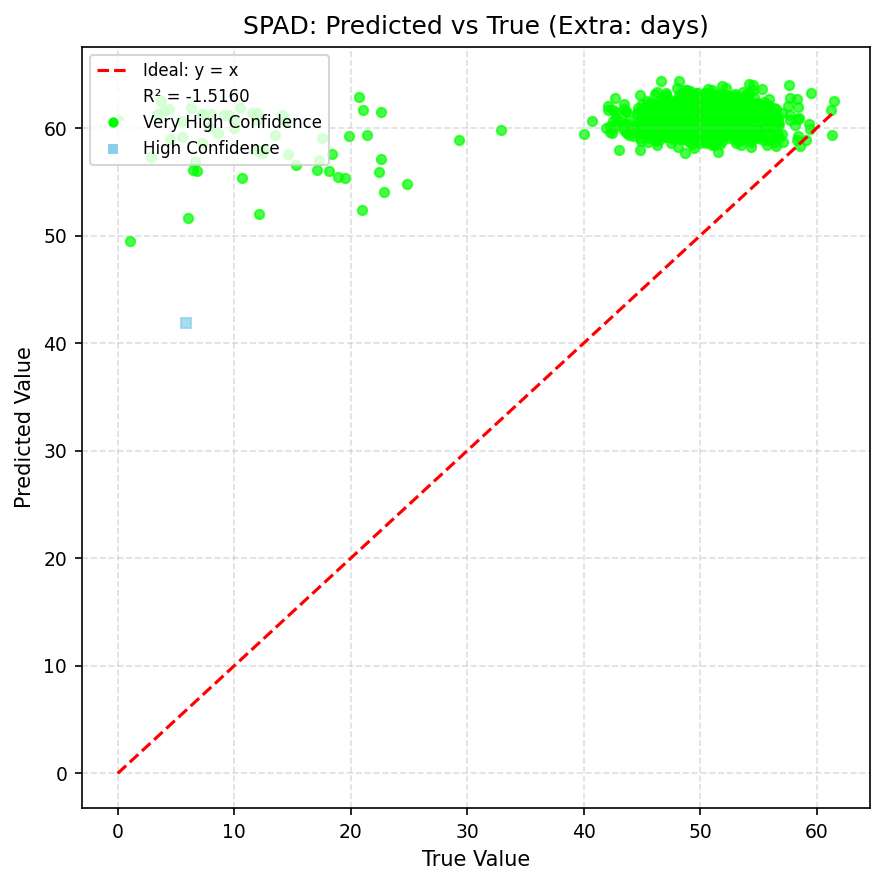


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
57 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_MobileViTV2ConfidenceAddtwoextrainput_days-LAI_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  SPAD
modelBackbone:  MobileViTV2ConfidenceAddtwoextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.2478
MAE      : 7.5051
RMSE     : 10.3971


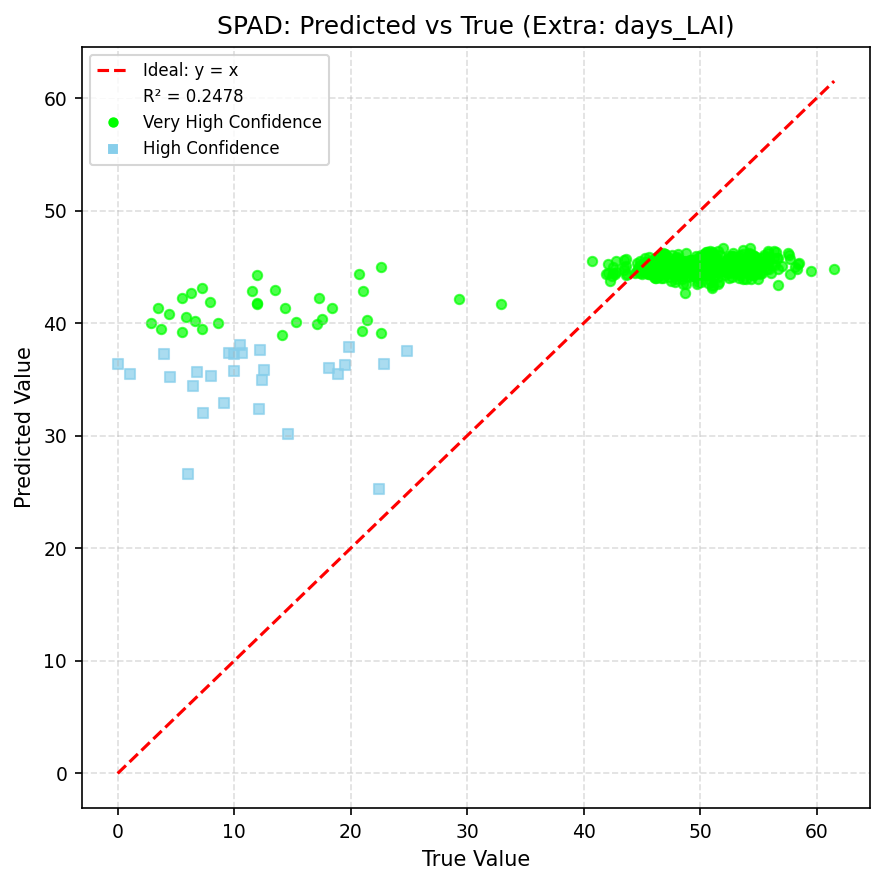


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
58 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_PoolFormerConfidenceAddOneExtraInput_days_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  PoolFormerConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.3130
MAE      : 7.2412
RMSE     : 8.4310


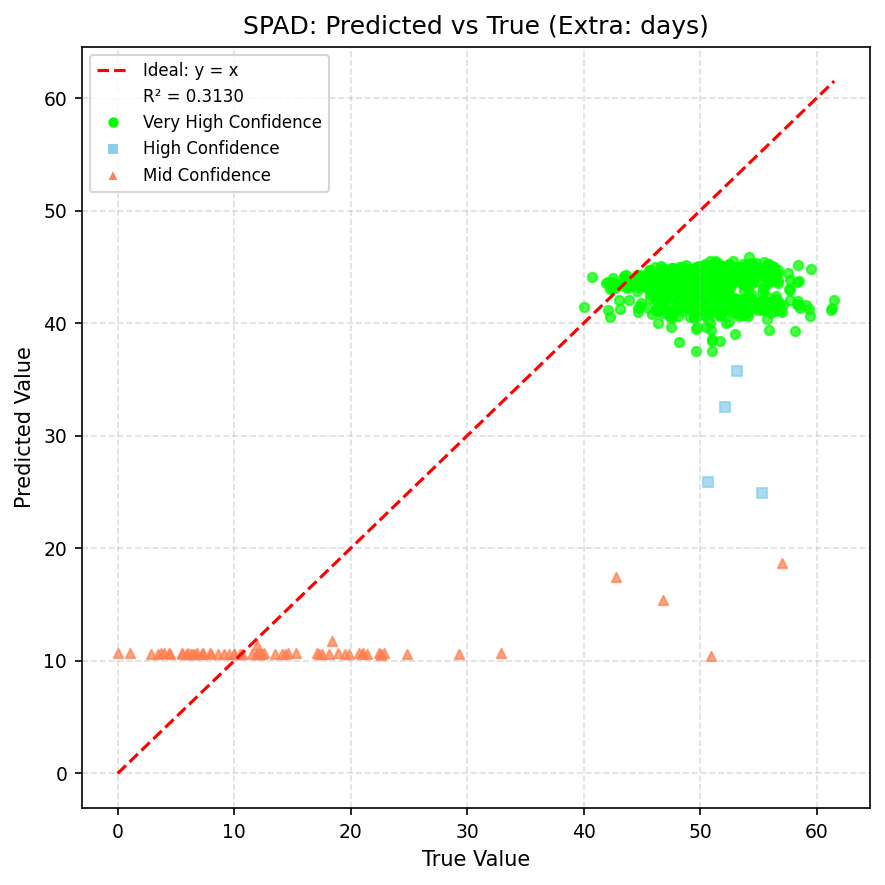


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
59 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_PoolFormerConfidenceAddTwoExtraInput_days-LAI_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  SPAD
modelBackbone:  PoolFormerConfidenceAddTwoExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.7318
MAE      : 3.9540
RMSE     : 6.2087


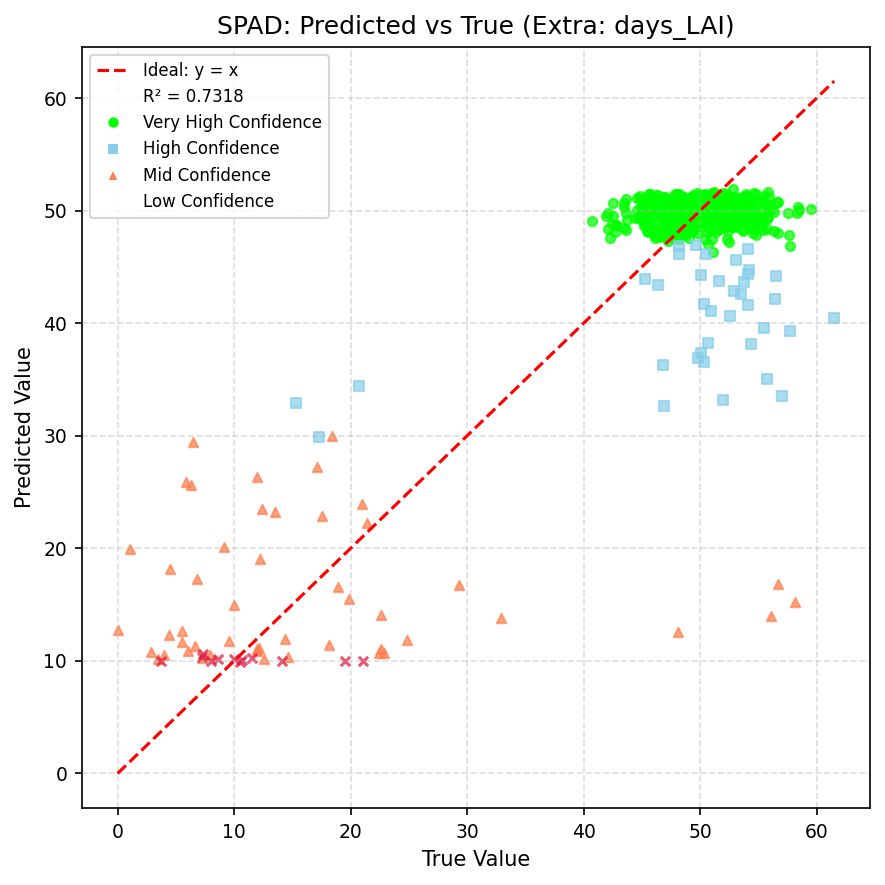


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
60 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_RegNetY8GFConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  RegNetY8GFConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.5433
MAE      : 4.3759
RMSE     : 6.8743


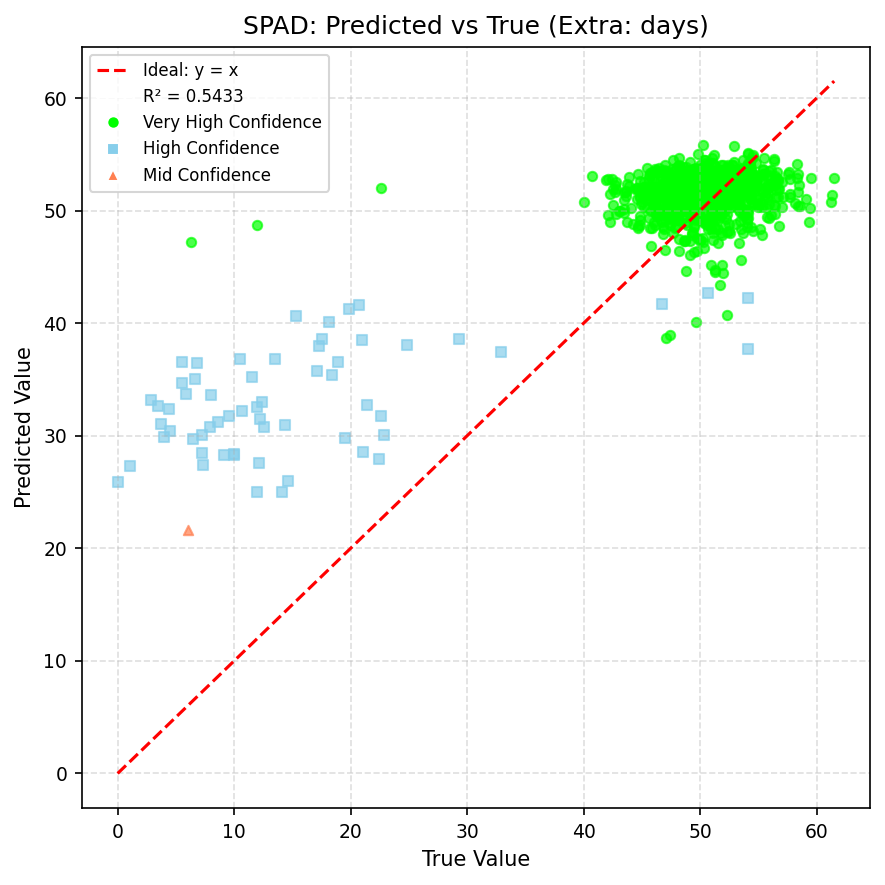


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
61 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_RegNetYConfidenceAdd2Inputs_days-LAI_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  SPAD
modelBackbone:  RegNetYConfidenceAdd2Inputs
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.7478
MAE      : 4.2283
RMSE     : 6.0197


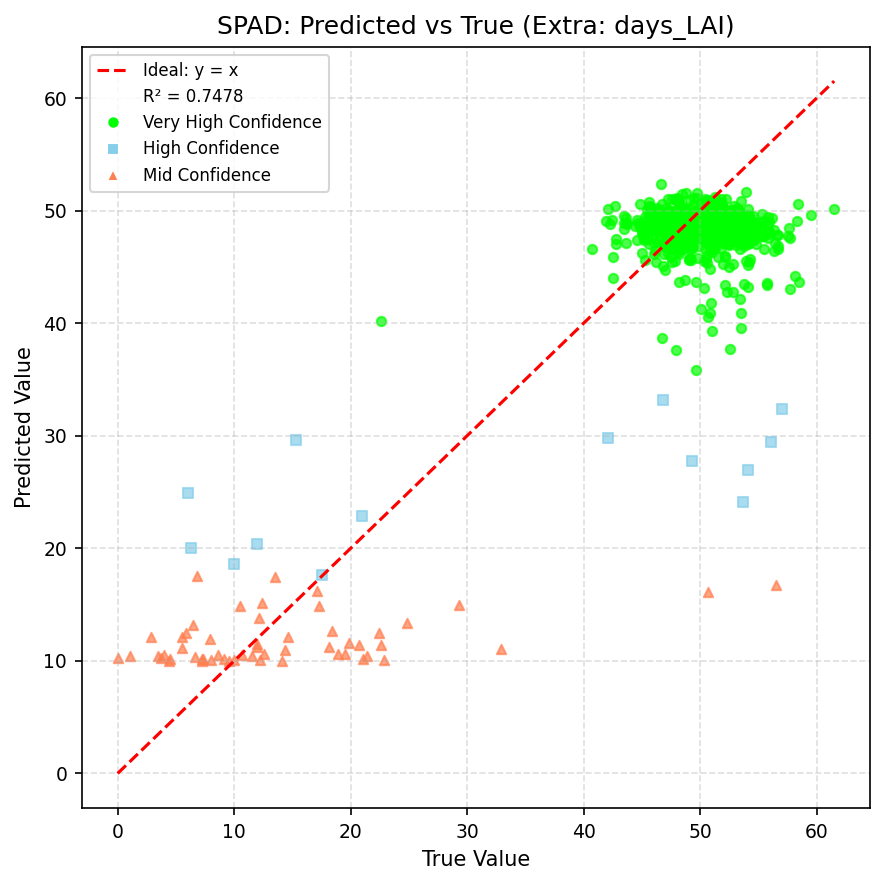


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
62 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_RepVGGA1ConfidenceAdd2Inputs_days-LAI_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  SPAD
modelBackbone:  RepVGGA1ConfidenceAdd2Inputs
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.6153
MAE      : 4.5993
RMSE     : 7.4353


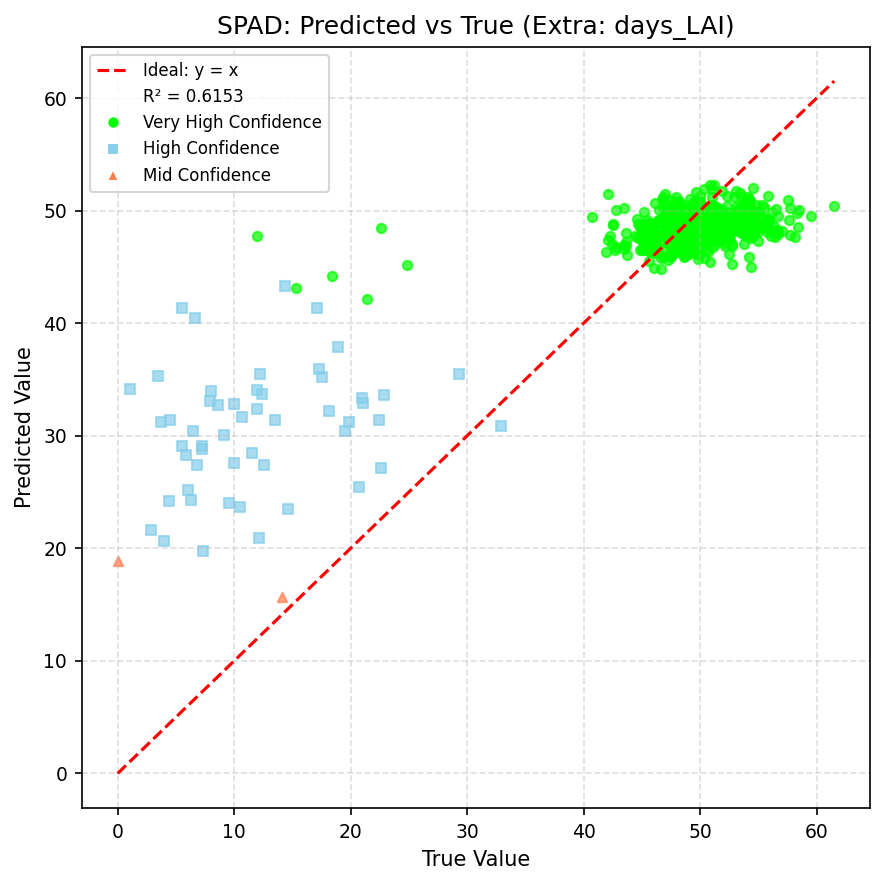


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
63 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_RepVGGA1ConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  RepVGGA1ConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.5358
MAE      : 5.0690
RMSE     : 6.9301


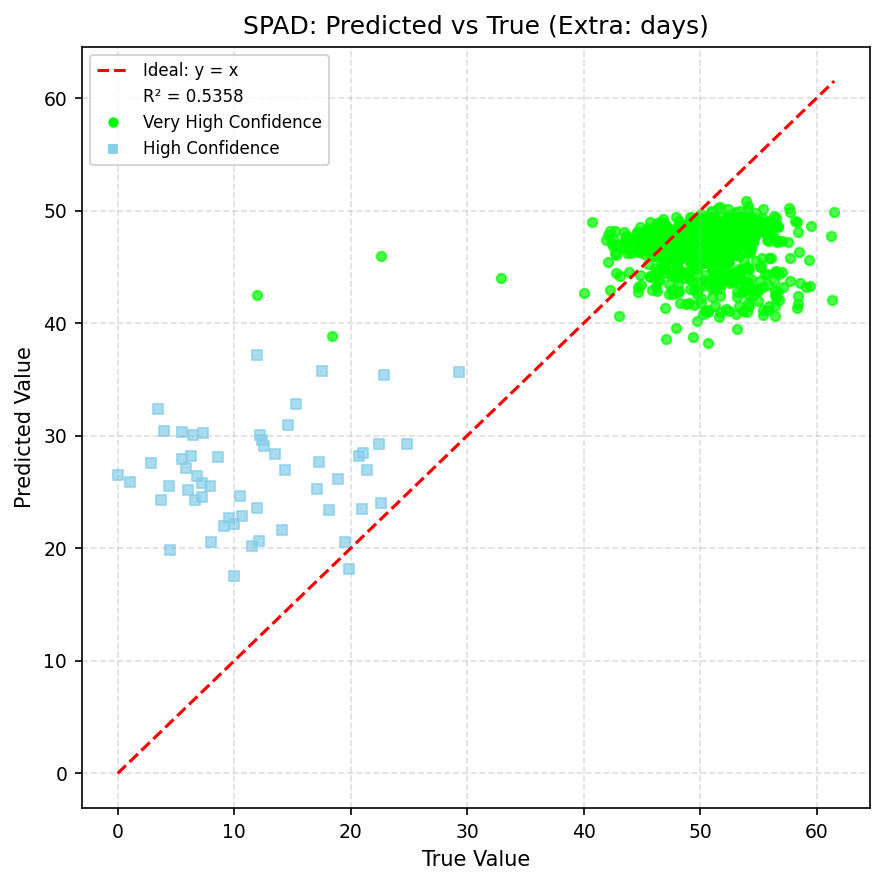


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
64 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_SwinV2ConfidenceAddOneExtraInput_days_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  SwinV2ConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.1521
MAE      : 6.2392
RMSE     : 10.9181


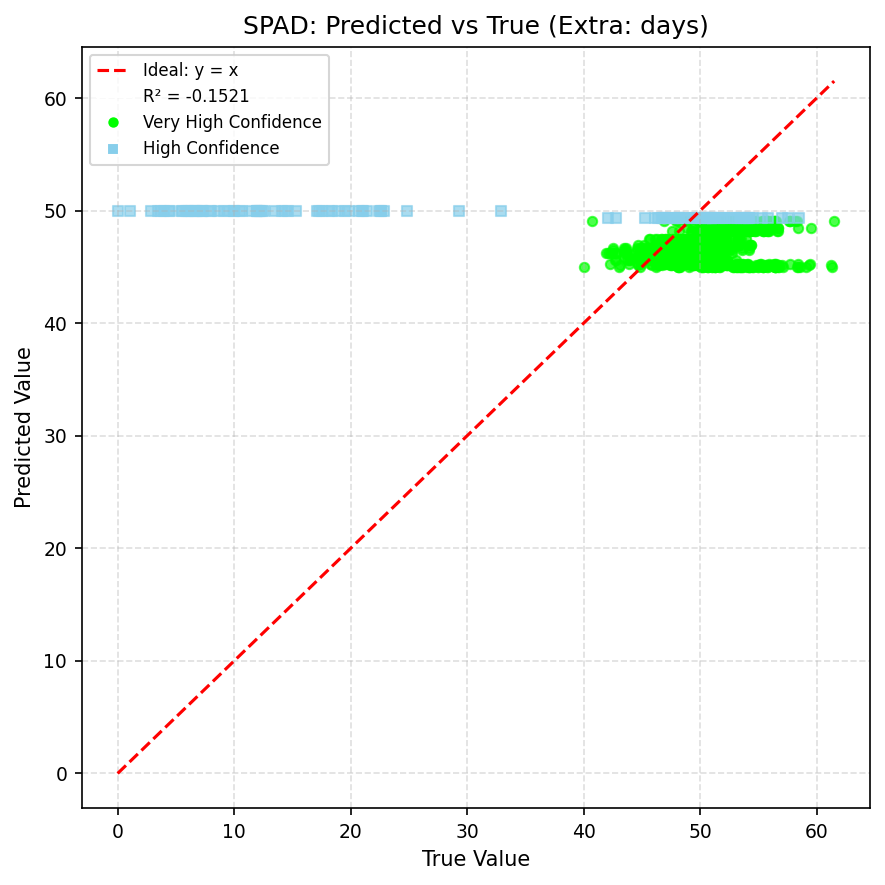


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
65 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/SPAD_SwinV2ConfidenceAddTwoExtraInput_days-LAI_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  SPAD
modelBackbone:  SwinV2ConfidenceAddTwoExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing:   0%|          | 0/38 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : 0.8434
MAE      : 3.6521
RMSE     : 4.7439


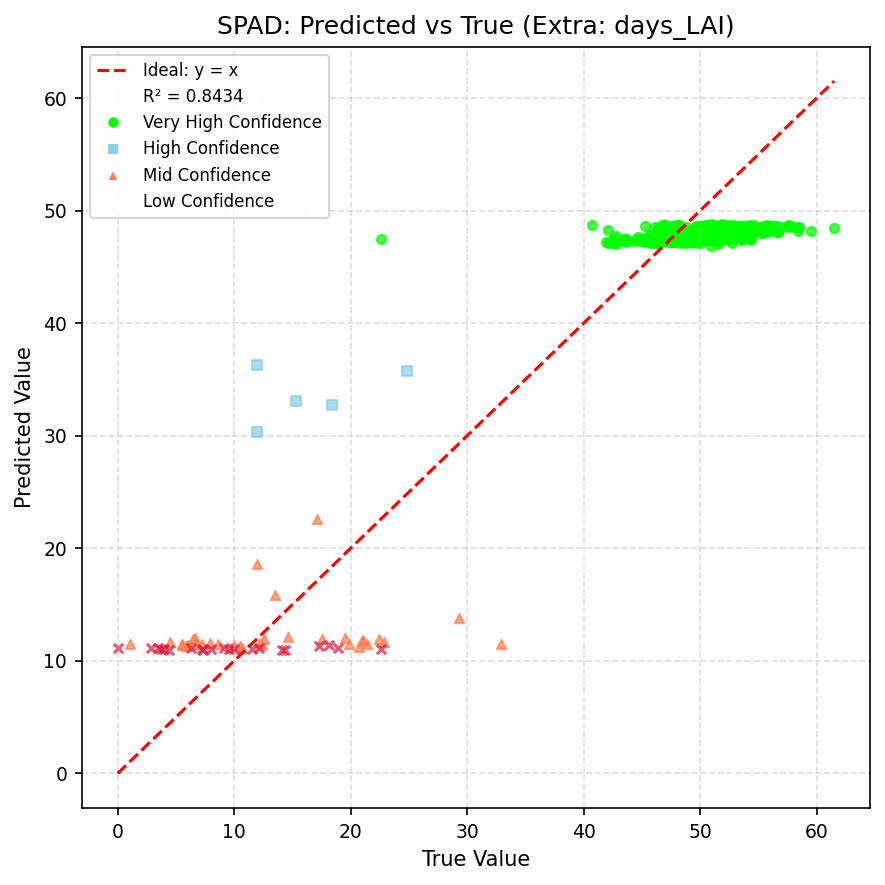


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
66 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/totEarNum_CoAtNetConfidenceAddOneExtraInput_days_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  CoAtNetConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing:   0%|          | 0/60 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -4.6347
MAE      : 171.9224
RMSE     : 196.2209


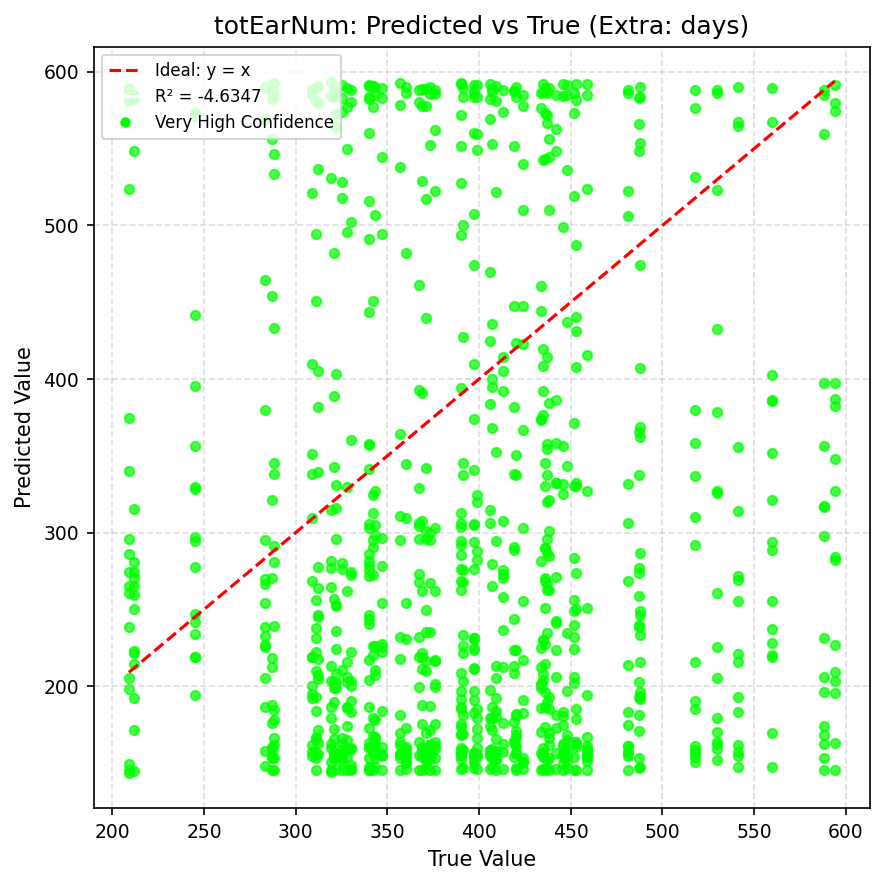


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
67 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/totEarNum_ConvNeXtTinyConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  ConvNeXtTinyConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing:   0%|          | 0/60 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.6279
MAE      : 82.9305
RMSE     : 105.4679


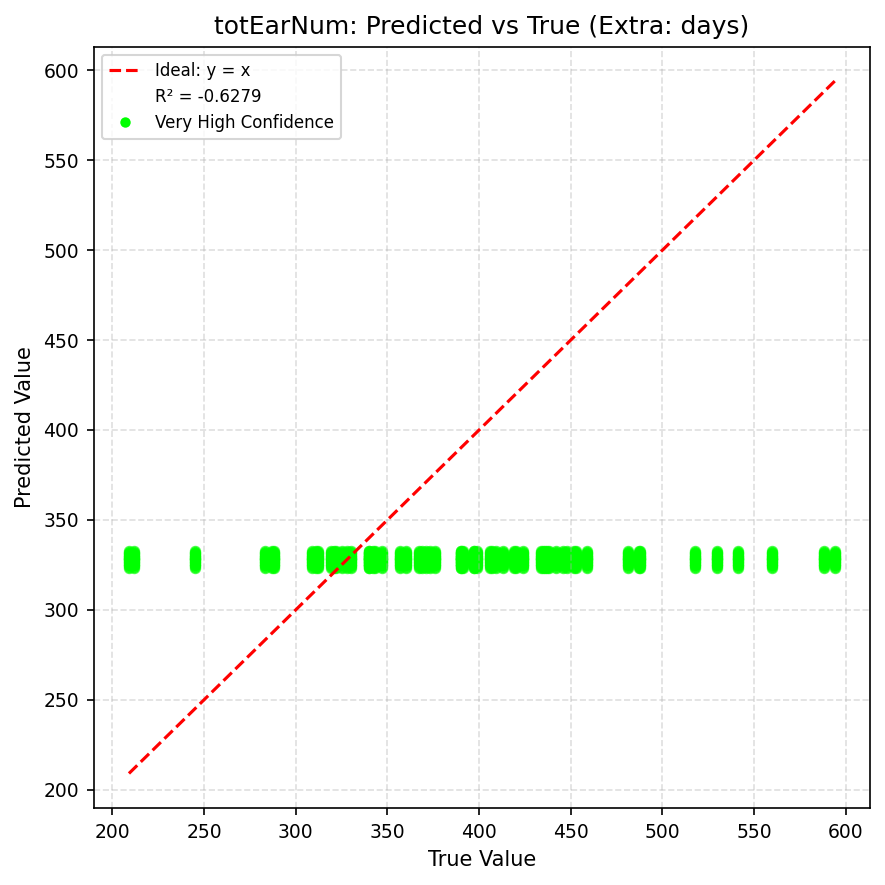


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
68 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/totEarNum_DenseNetConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  DenseNetConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing:   0%|          | 0/60 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -3.2290
MAE      : 131.5230
RMSE     : 169.9918


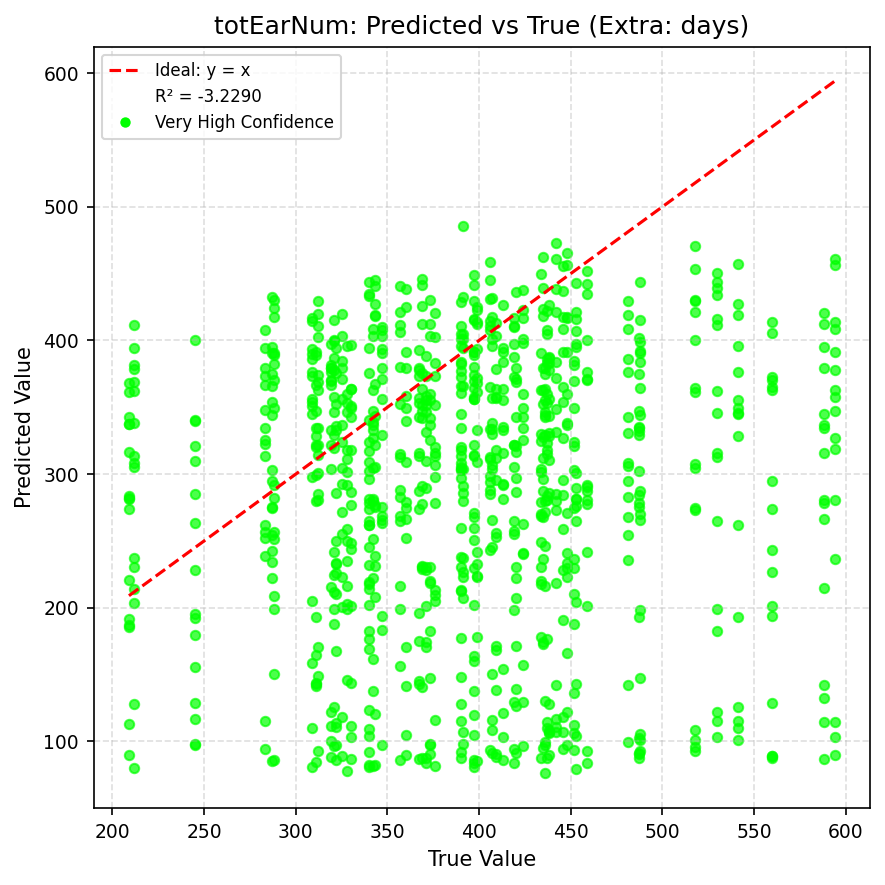


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
69 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/totEarNum_EfficientFormerConfidenceAddOneExtraInput_days_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  EfficientFormerConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing:   0%|          | 0/60 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -3.5995
MAE      : 149.2842
RMSE     : 177.2817


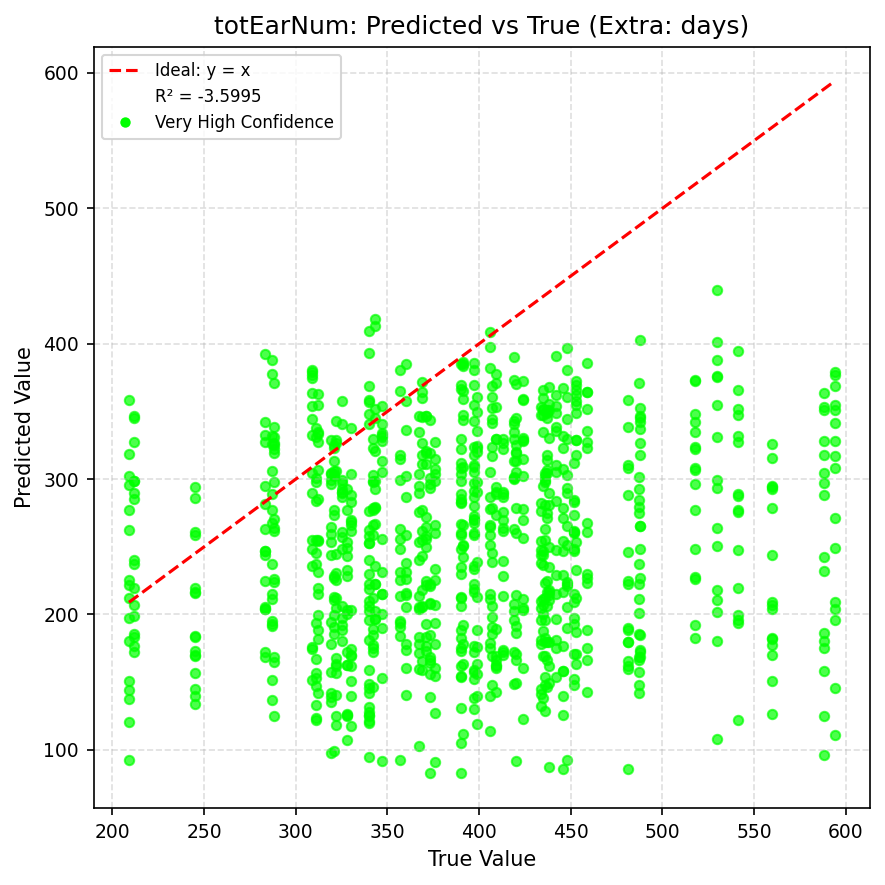


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
70 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/totEarNum_EfficientNetV2MConfidenceAddeonextrainput_days_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  EfficientNetV2MConfidenceAddeonextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing:   0%|          | 0/60 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -1.6979
MAE      : 108.0290
RMSE     : 135.7748


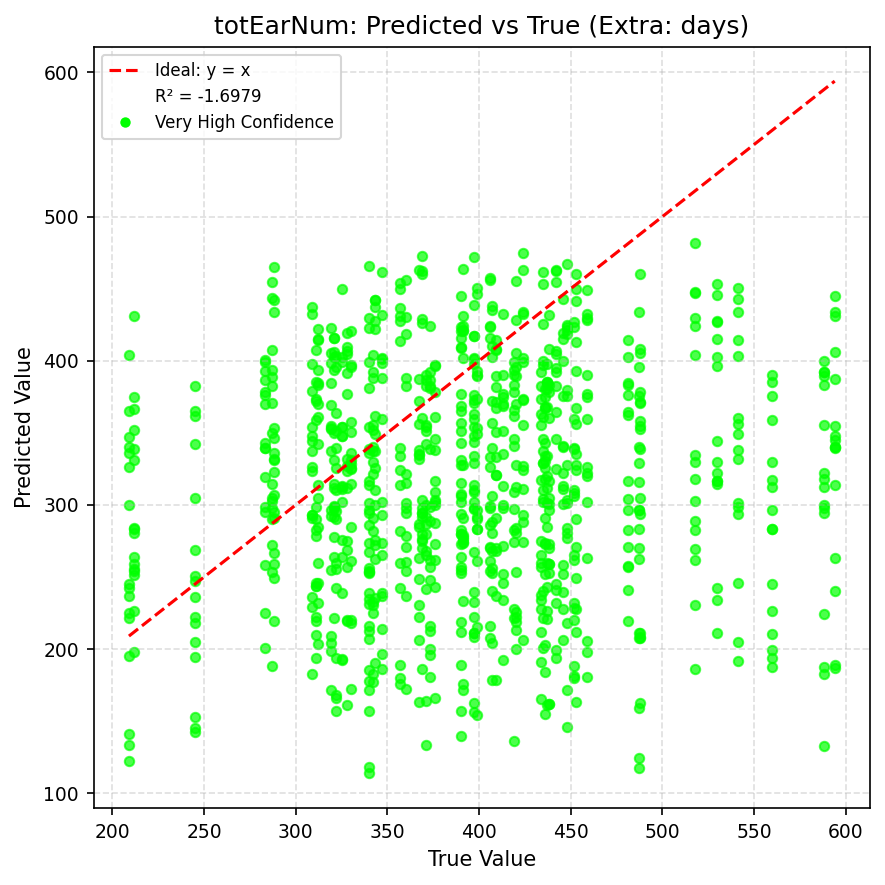


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
71 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/totEarNum_FocalNetConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  FocalNetConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing:   0%|          | 0/60 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -2.4176
MAE      : 125.0907
RMSE     : 152.8174


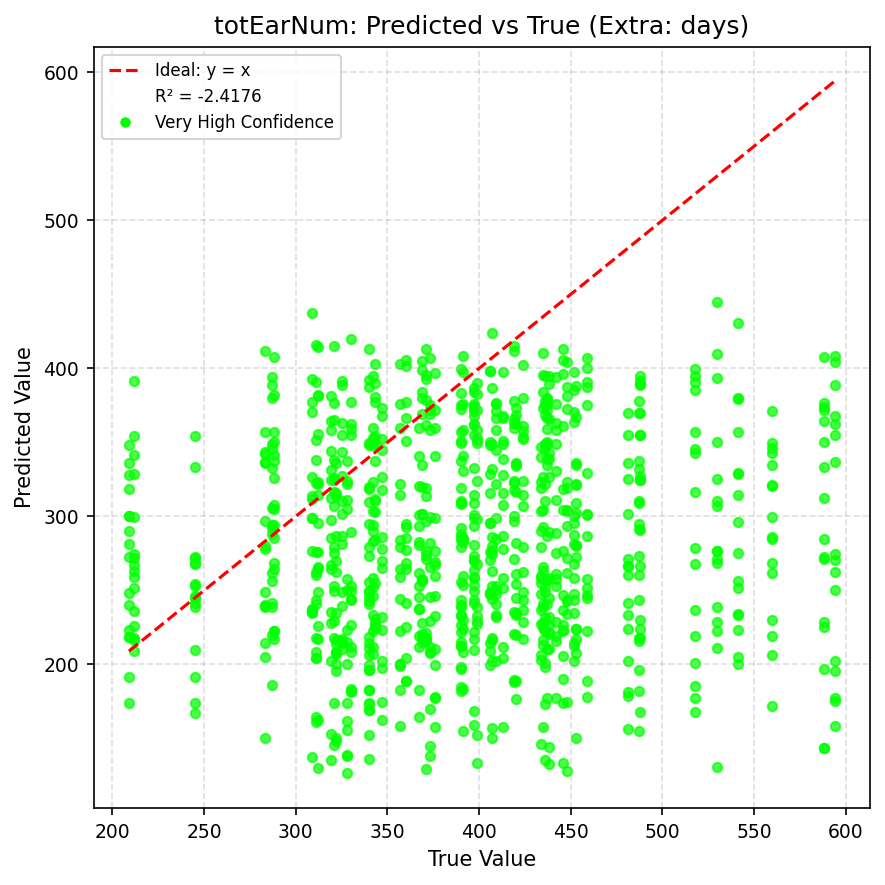


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
72 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/totEarNum_MaxViTConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  MaxViTConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing:   0%|          | 0/60 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.8524
MAE      : 88.1403
RMSE     : 112.5060


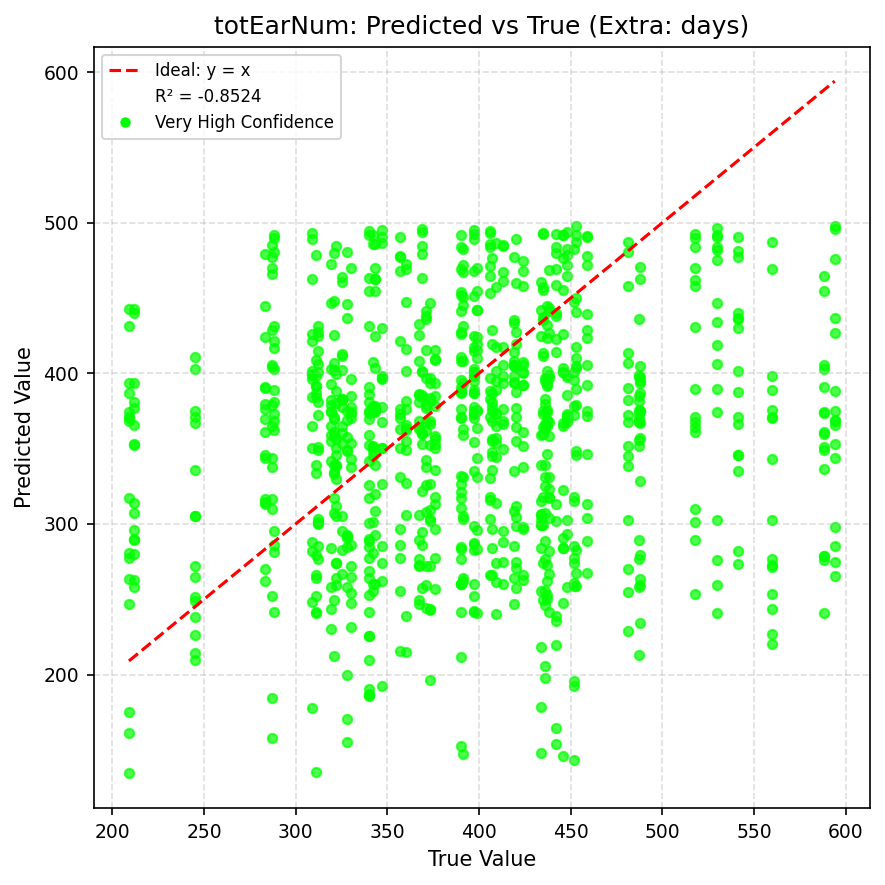


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
73 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/totEarNum_MobileOneConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  MobileOneConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing:   0%|          | 0/60 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -1.5024
MAE      : 104.7453
RMSE     : 130.7649


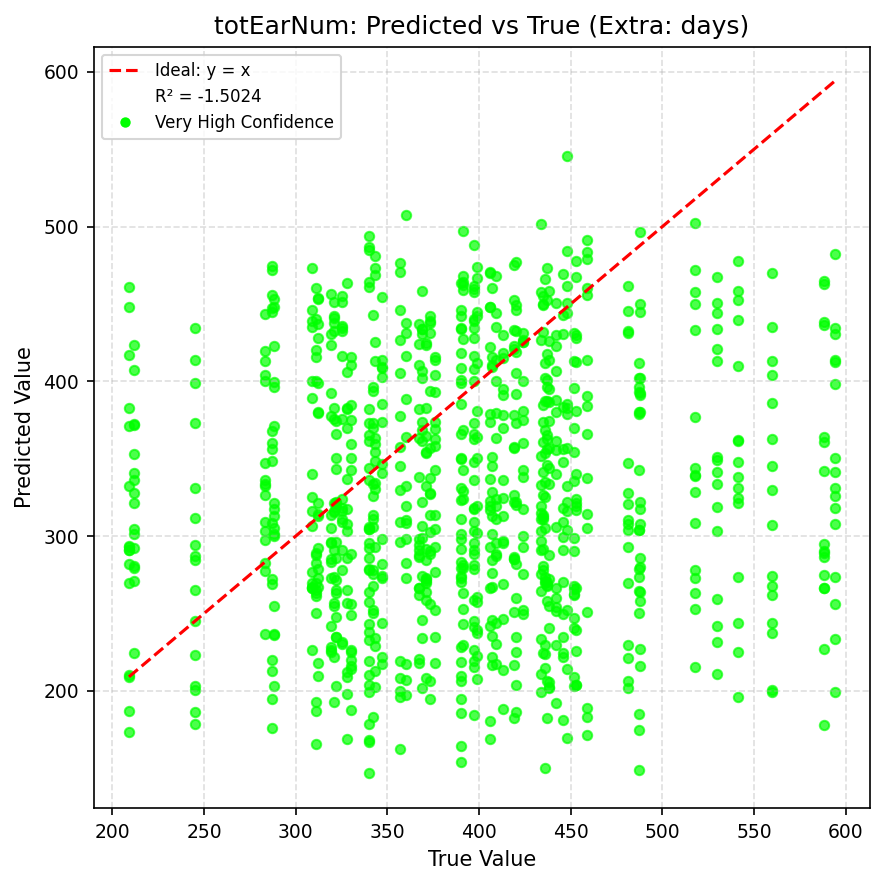


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
74 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/totEarNum_MobileViTV2ConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  MobileViTV2ConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing:   0%|          | 0/60 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -0.9449
MAE      : 92.2390
RMSE     : 115.2816


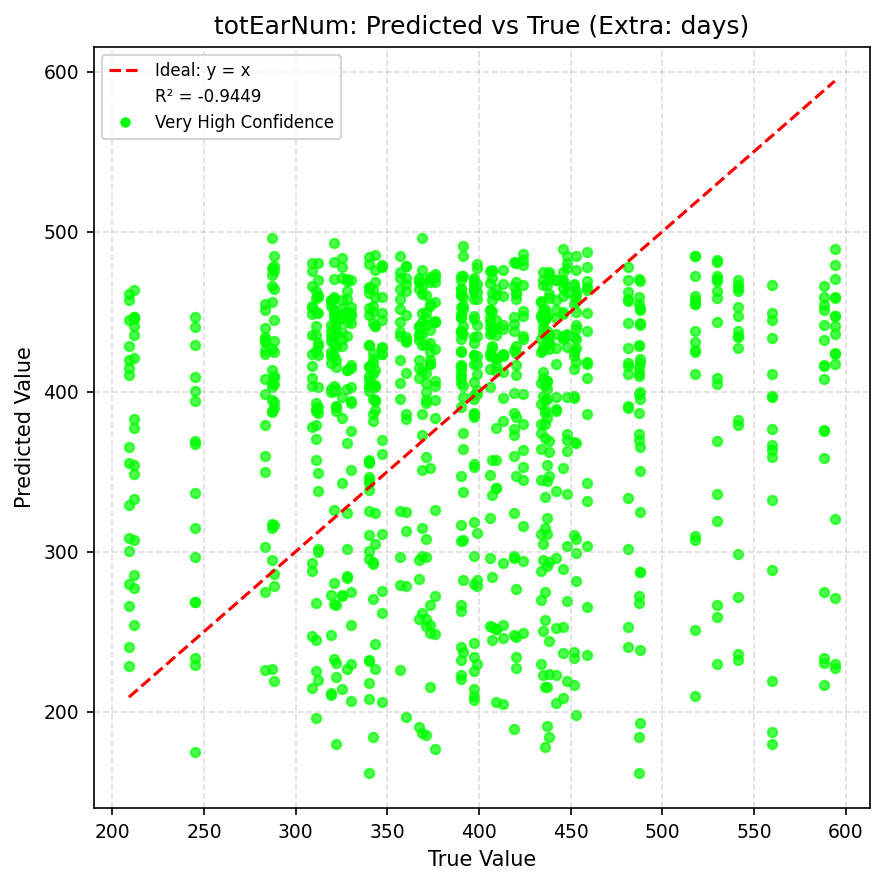


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
75 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/totEarNum_PoolFormerConfidenceAddOneExtraInput_days_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  PoolFormerConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing:   0%|          | 0/60 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -1.1786
MAE      : 96.6021
RMSE     : 122.0100


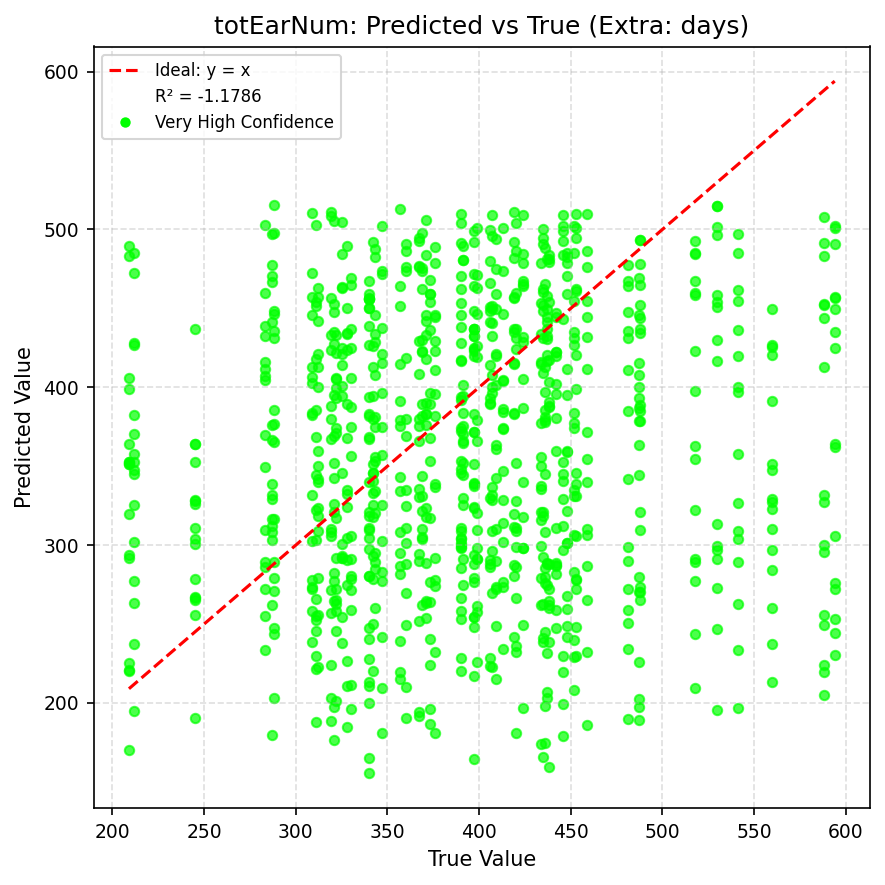


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
76 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/totEarNum_RegNetY8GFConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  RegNetY8GFConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing:   0%|          | 0/60 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -1.2168
MAE      : 98.7404
RMSE     : 123.0756


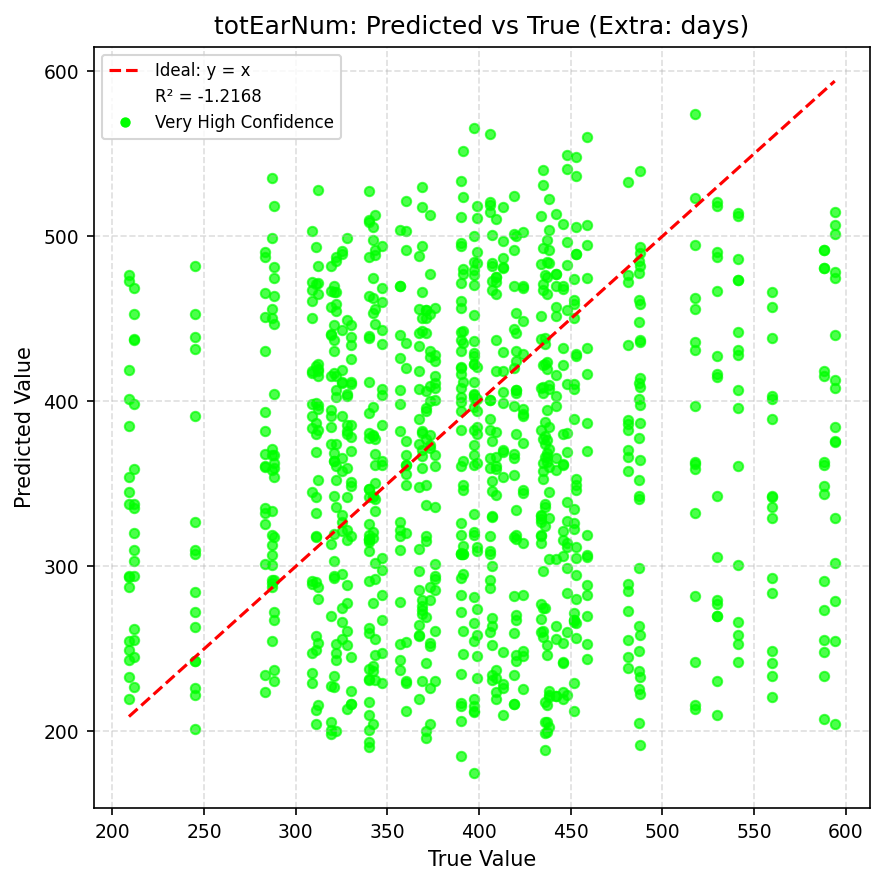


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
77 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/totEarNum_RepVGGA1ConfidenceAddoneextrainput_days_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  RepVGGA1ConfidenceAddoneextrainput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing:   0%|          | 0/60 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -1.5199
MAE      : 101.4766
RMSE     : 131.2218


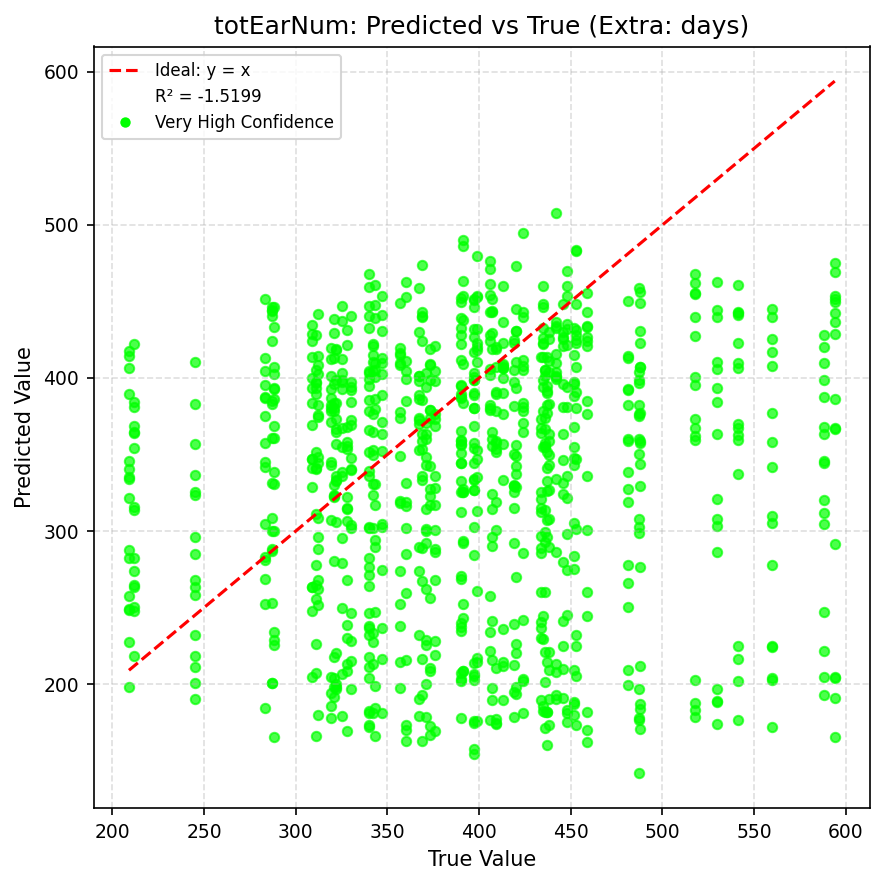


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv
78 / 78
modelPath:  /Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/totEarNum_SwinV2ConfidenceAddOneExtraInput_days_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  SwinV2ConfidenceAddOneExtraInput
Using device: mps
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing:   0%|          | 0/60 [00:00<?, ?it/s]/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update check


Test Results:
R² Score : -1.6668
MAE      : 113.3786
RMSE     : 134.9911


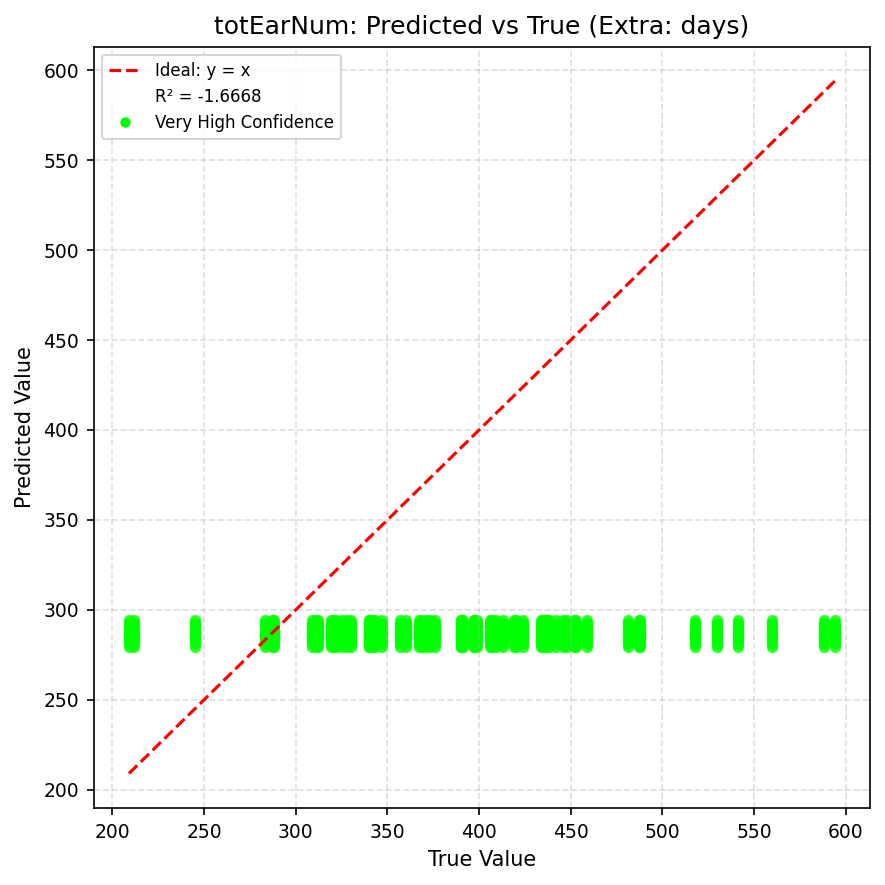


✅ Test results saved to: ./ModelTestResult/ExtraInputModel/all_test_metrics.csv


In [16]:
# loopTestModelNoExtraByPath("/Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModel/")
loopTestModelExtraInputByPath("/Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/")